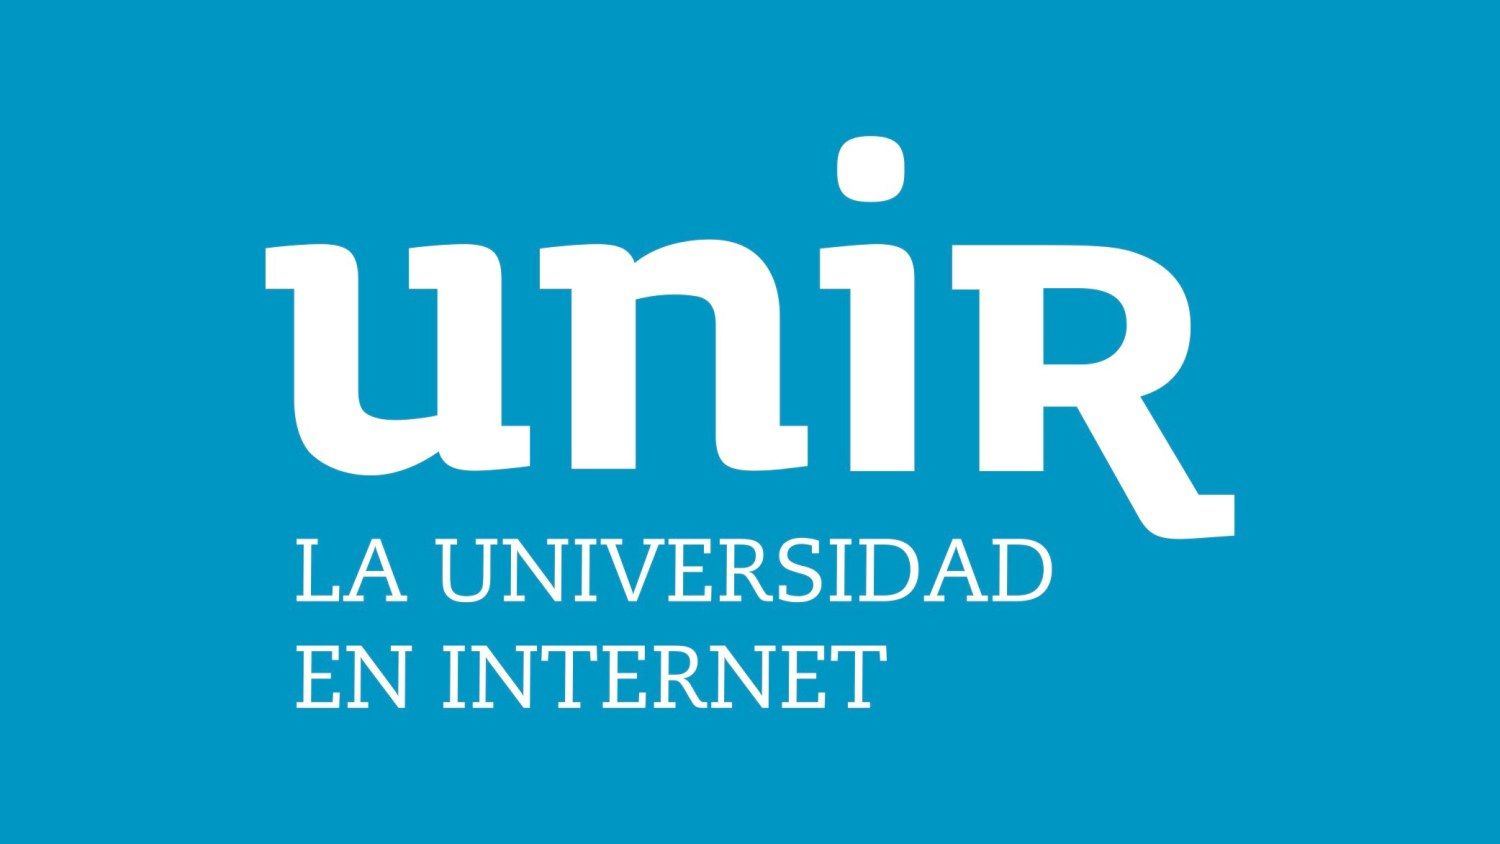




<center>

# **Actividad2 :Actividad: Clasificación con máquinas de vectores de soporte y random forest**

   # **Curso: Tecnicas de Machine Learning**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>

![image.png](attachment:image.png)

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [6]:
import numpy as np # Se importa numpy para trabajar con operaciones matematicas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# se carga el dataset
#df = pd.read_csv('covertype/covtype.csv') # para conectarme directo al sitio web del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
df = pd.read_csv(url, header=None)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Vemos que las columnas no tienen cabecera la cual por buenas practicas es asignar nombres a las columnas o campos para entender mucho mejor el dataset.

In [14]:
# Asignar nombres a las columnas
column_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points'] + \
               [f'Wilderness_Area_{i}' for i in range(4)] + \
               [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']
df.columns = column_names

In [15]:
#vista previa del dataset con las cabeceras incluidas
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


¿Cuántas instancias de datos tiene el dataset?

In [16]:
## PON AQUÍ TU CÓDIGO
num_instances = df.shape[0]
print(f'Número de instancias: {num_instances}')

Número de instancias: 581012


In [17]:
df.shape

(581012, 55)

## PON AQUÍ TU RESPUESTA
"Número de instancias: 581012" indica que el dataset covtype.csv contiene 581.012 instancias de datos. Esto significa que hay 581.012 registros o filas en el dataset, cada uno de los cuales representa una observación individual.

¿Cuántas variables continuas hay en el dataset?

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_0                   581012 non-null  int64
 11  Wilderness_Area_1                   581012 non-null 

vemos que aparentemente son todas categoricas, sin embargo tenemos que analizar cuantos son valores unicos las cuales son continuas, y los que tienen 2 valores unicos son binarias las cuales son categorias

In [19]:
# Identificar variables continuas
continuous_vars = [col for col in df.columns if len(df[col].unique()) > 2 and col != 'Cover_Type']
num_continuous_vars = len(continuous_vars)
print(f'Número de variables continuas: {num_continuous_vars}')
print(f'Variables continuas: {continuous_vars}')

Número de variables continuas: 10
Variables continuas: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


 variables continuas
  identifica las variables continuas basándose en la cantidad de valores únicos (más de 2) y excluye la columna de la variable objetivo ('Cover_Type'). Finalmente, imprime el número de variables continuas y sus nombres.
Explicación:

* len(df[col].unique()) > 2 asegura que solo las columnas con más de 2 valores únicos (continuas) sean consideradas.
* col != 'Cover_Type' excluye la columna de la variable objetivo del conteo de variables continuas.

1. Elevation
2. Aspect
3. Slope
4. Horizontal_Distance_To_Hydrology
5. Vertical_Distance_To_Hydrology
6. Horizontal_Distance_To_Roadways
7. Hillshade_9am
8. Hillshade_Noon
9. Hillshade_3pm
10. Horizontal_Distance_To_Fire_Points

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

hay X variables categóricas

In [20]:
## PON AQUÍ TU CÓDIGO
# Identificar variables categóricas
# crea un lista que contiene los nombres de las columnas del DataFrame df que tienen 7 o menos valores únicos.
#  proporciona una lista de todos los nombres de columnas en el DataFrame
categorical_vars = [col for col in df.columns if df[col].nunique() <= 7]
#variables categóricas contando los elementos en la lista categorical_vars.
num_categorical_vars = len(categorical_vars)
#Imprimir el número de variables categóricas y sus nombres:
print(f'Número de variables categóricas: {num_categorical_vars}')
print(f'Variables categóricas: {categorical_vars}')


Número de variables categóricas: 45
Variables categóricas: ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Cover_Type']


El resultado indica que hay 45 variables categóricas en el dataset, las cuales incluyen:

* Las columnas de áreas silvestres (Wilderness_Area_*).
* Las columnas de tipos de suelo (Soil_Type_*).
* La columna de la variable objetivo (Cover_Type).


El criterio de 7 valores únicos incluye todas las variables binarias, así como la variable objetivo que tiene múltiples clases (más de dos clases).

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Distribución de etiquetas de clase:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


<ipython-input-21-d05927d40f7c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


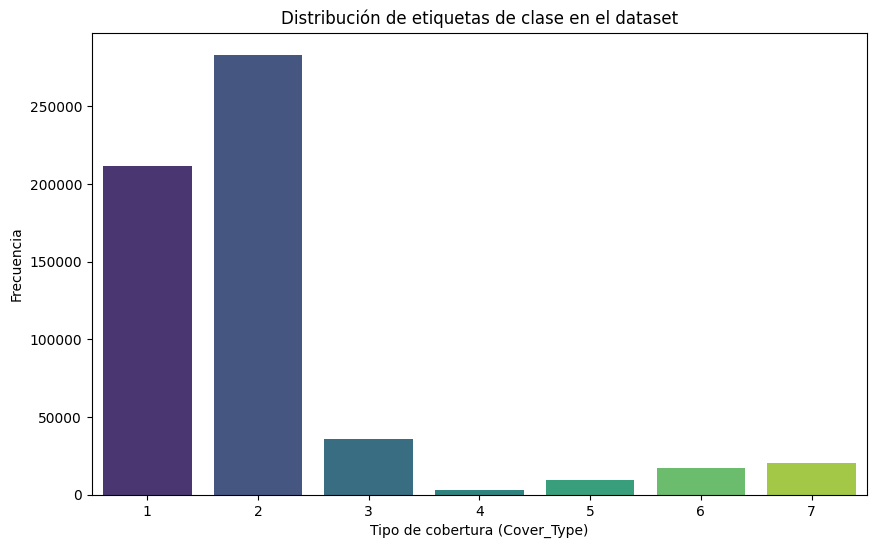

Porcentaje de cada clase:
Cover_Type
1    36.460521
2    48.759922
3     6.153746
4     0.472796
5     1.633873
6     2.989095
7     3.530048
Name: count, dtype: float64
¿El dataset está balanceado? False


In [21]:
## PON AQUÍ TU CÓDIGO
# Distribución de etiquetas de clase
#Se cuenta la cantidad de instancias de cada clase en la columna Cover_Type y se ordenan los resultados por índice.
class_distribution = df['Cover_Type'].value_counts().sort_index()
#Se imprime la distribución de etiquetas de clase.
print(f'Distribución de etiquetas de clase:\n{class_distribution}')

# Visualizar la distribución
#Se utiliza seaborn para crear un gráfico de barras que muestre la distribución de las etiquetas de clase
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Distribución de etiquetas de clase en el dataset')
plt.xlabel('Tipo de cobertura (Cover_Type)')
plt.ylabel('Frecuencia')
plt.show()

# Verificar si el dataset está balanceado
#Se obtiene el total de instancias en el dataset.
total_instances = len(df)
#Se imprime el porcentaje de cada clase.
balance_check = class_distribution / total_instances * 100
print(f'Porcentaje de cada clase:\n{balance_check}')

# Determinación del balance
is_balanced = all((balance_check >= 5) & (balance_check <= 20))  # Por ejemplo, balanceado si todas clases tienen entre 5% y 20%
print(f'¿El dataset está balanceado? {is_balanced}')

# Código  para graficar valores atípicos (caja y bigotes)

IndexError: index 4 is out of bounds for axis 0 with size 4

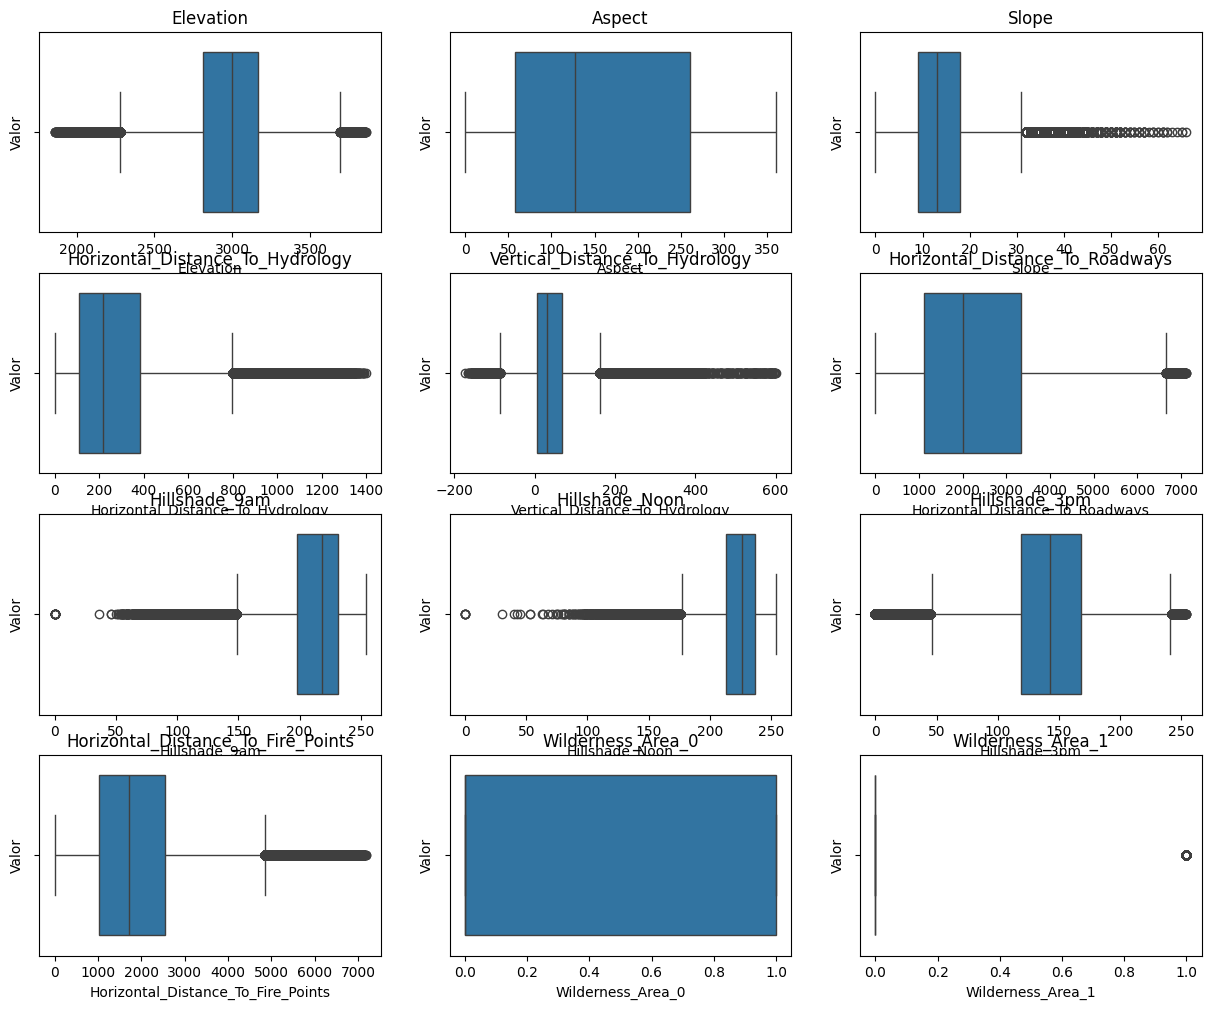

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las variables numéricas
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Crear figura y subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Recorrer las variables numéricas
for i, feature in enumerate(numeric_features):
    row = i // 3
    col = i % 3

    # Generar gráfico de caja y bigotes
    sns.boxplot(x=feature, data=df, ax=axes[row, col])

    # Ajustar título y etiquetas
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Valor')

# Ajustar diseño general
plt.tight_layout()
plt.show()


Al analizar los gráficos de caja y bigotes, se pueden observar algunos patrones generales:

* Variables con pocos valores atípicos: Algunas variables, como Elevation, Aspect, Slope, Horizontal_Distance_To_Fire_Points, y Wilderness_Area_1 muestran una distribución relativamente normal con pocos valores atípicos que se encuentran fuera de los bigotes.
* Variables con valores atípicos moderados: Otras variables, como Horizontal_Bistanco_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal Hillshade, Vertical Hillshade, Wilderness_Area_0, y Horizontal_Distance_To_Fire_Points presentan una distribución con más valores atípicos que se ubican fuera de los bigotes.
* Variables con abundantes valores atípicos: Las variables Elevation y Slope presentan una cantidad significativa de valores atípicos, especialmente en los extremos superiores de la distribución.


En general, se puede concluir que el dataset df contiene algunos valores atípicos para varias variables numéricas. La presencia de estos valores atípicos podría afectar el rendimiento de los modelos de aprendizaje automático entrenados en este dataset, especialmente si no se utilizan técnicas de tratamiento de valores atípicos adecuadas.

_PON AQUÍ TU RESPUESTA_

Para determinar si un dataset está balanceado, se considera que las clases deben estar representadas de manera relativamente equitativa. Una regla comúnmente aceptada es que ningún grupo de clase debe ser extremadamente más grande o más pequeño que otros. Específicamente, se podría considerar un dataset balanceado si la proporción de instancias de cada clase es similar.

# Evaluación de balance:
* Clase 1: 36.46%
* Clase 2: 48.76%
* Clase 3: 6.15%
* Clase 4: 0.47%
* Clase 5: 1.63%
* Clase 6: 2.99%
* Clase 7: 3.53%

# Análisis:
* Las clases 1 y 2 dominan el dataset, representando aproximadamente el 85% de las instancias.
* Las clases 4, 5, 6 y 7 están significativamente subrepresentadas, con menos del 5% cada una.
* La clase 3 tiene una proporción mayor que las clases 4 a 7, pero aún significativamente menor que las clases 1 y 2.

# Conclusión:
No, el dataset no está balanceado. La distribución de las etiquetas de clase muestra una gran disparidad en el número de instancias entre las diferentes clases. La mayoría de los datos pertenecen a las clases 1 y 2, mientras que las otras clases están subrepresentadas. Para estar balanceado, esperaríamos que las clases tuvieran porcentajes más cercanos entre sí.

Un dataset balanceado típicamente tendría una distribución más uniforme, donde las clases tienen porcentajes comparables y no existen clases que dominen o estén severamente subrepresentadas. En este caso, la alta concentración de datos en unas pocas clases (1 y 2) indica un desbalance significativo, lo que puede afectar la performance y la capacidad de generalización de los modelos de clasificación.

¿Existen valores nulos o perdidos en el dataset?

In [22]:
## PON AQUÍ TU CÓDIGO
# Verificar valores nulos en el dataset
null_values = df.isnull().sum()
# Mostrar columnas con valores nulos
print(null_values[null_values > 0])
# Verificar si hay algún valor nulo en todo el dataset
has_nulls = df.isnull().values.any()
print(f'¿Existen valores nulos en el dataset? {has_nulls}')

Series([], dtype: int64)
¿Existen valores nulos en el dataset? False


_PON AQUÍ TU RESPUESTA_
 el resultado False indica que el dataset df no tiene valores nulos, lo cual es positivo porque significa que no necesitas realizar ningún preprocesamiento adicional relacionado con valores faltantes antes de proceder con el análisis o modelado.

¿Existe alguna variable altamente correlacionada con la variable de clase?

In [14]:
# PARA VER LA DISTRIBUCION DE DATOS y ver la correlacion entre las variables.
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

Para determinar si existe alguna variable altamente correlacionada con la variable de clase, podemos filtrar aquellas correlaciones superiores a un umbral, como 0.80, con respecto a la variable de clase.

In [15]:
## PON AQUÍ TU CÓDIGO
#calcula la correlación de todas las variables con la variable de clase (Cover_Type) y .abs() toma el valor absoluto de las correlaciones
class_correlation = df.corr()['Cover_Type'].abs()

# Filtrar correlaciones superiores a 0.80
highly_correlated_vars = class_correlation[class_correlation > 0.80].index.tolist()

print("Variables altamente correlacionadas con la variable de clase (Cover_Type):")
print(highly_correlated_vars)


Variables altamente correlacionadas con la variable de clase (Cover_Type):
['Cover_Type']


El resultado del código indica que la única variable altamente correlacionada con la variable de clase (Cover_Type) es la misma variable de clase.
En términos prácticos, esta correlación indica que la variable de clase es un predictor fuerte de sí misma, lo cual es obvio ya que su propósito es etiquetar las observaciones en clases específicas.

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

_PON AQUÍ TU RESPUESTA_

Para determinar qué variables del dataset pueden influir más en la clasificación de los datos, podemos utilizar técnicas estadísticas como ANOVA (Análisis de Varianza), CHI-CUADRADO Y PEARSON o pruebas de correlación para evaluar la relación entre cada variable y la variable de clase.

In [16]:
from scipy.stats import f_oneway

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar las tres variables continuas más correlacionadas con la variable de clase
top_three_continuous = correlation_matrix['Cover_Type'].abs().nlargest(4).index.tolist()[1:]

# Realizar la prueba ANOVA para cada variable continua seleccionada
for var in top_three_continuous:
    # Realizar la prueba ANOVA
    f_statistic, p_value = f_oneway(df[df['Cover_Type'] == 1][var],
                                     df[df['Cover_Type'] == 2][var],
                                     df[df['Cover_Type'] == 3][var],
                                     df[df['Cover_Type'] == 4][var],
                                     df[df['Cover_Type'] == 5][var],
                                     df[df['Cover_Type'] == 6][var],
                                     df[df['Cover_Type'] == 7][var])
    print(f"Prueba ANOVA para la variable '{var}':")
    print(f"Estadístico F: {f_statistic}, Valor p: {p_value}")


Prueba ANOVA para la variable 'Wilderness_Area_3':
Estadístico F: 114625.87420870933, Valor p: 0.0
Prueba ANOVA para la variable 'Elevation':
Estadístico F: 155306.86902091114, Valor p: 0.0
Prueba ANOVA para la variable 'Soil_Type_9':
Estadístico F: 27680.042158903016, Valor p: 0.0


Las pruebas ANOVA proporciona información sobre la significancia de la relación entre cada variable seleccionada y la variable de clase (Cover_Type).
* Prueba ANOVA para la variable 'Wilderness_Area_3':
Estadístico F: El valor del estadístico F es extremadamente alto, indicando una gran variación entre las medias de los grupos.
Valor p: El valor p es 0.0, lo que significa que la probabilidad de obtener un estadístico F tan grande o más extremo si la hipótesis nula fuera verdadera es prácticamente nula
* Estadístico F: El valor del estadístico F es extremadamente alto, indicando una gran variación entre las medias de los grupos.
Valor p: El valor p es 0.0, lo que significa que la probabilidad de obtener un estadístico F tan grande o más extremo si la hipótesis nula fuera verdadera es prácticamente nula
* Prueba ANOVA para la variable 'Soil_Type_9':
Estadístico F: Al igual que en las pruebas anteriores, el valor del estadístico F es alto, indicando variación entre las medias de los grupos.
Valor p: El valor p es nuevamente 0.0, lo que sugiere una diferencia significativa entre las medias de la variable 'Soil_Type_9' para al menos una de las clases de la variable de clase.

los resultados indican que las variables 'Wilderness_Area_3', 'Elevation' y 'Soil_Type_9' son todas estadísticamente significativas para predecir la variable de clase ('Cover_Type'), ya que muestran diferencias significativas entre las medias de las variables para al menos una de las clases de la variable de clase. Esto sugiere que estas variables podrían influir considerablemente en la clasificación de los datos.

In [17]:
# evaluo aplicando chi-cuadrado
from scipy.stats import chi2_contingency

# Seleccionar las tres variables categóricas más correlacionadas con la variable de clase
top_three_categorical = categorical_vars[:-1][:3]  # Excluimos la variable de clase 'Cover_Type'

# Realizar la prueba de Chi-cuadrado para cada variable categórica seleccionada
for var in top_three_categorical:
    # Tabulación cruzada de la variable categórica y la variable de clase
    contingency_table = pd.crosstab(df[var], df['Cover_Type'])

    # Realizar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Prueba de Chi-cuadrado para la variable '{var}':")
    print(f"Estadístico Chi-cuadrado: {chi2_stat}, Valor p: {p_value}")


Prueba de Chi-cuadrado para la variable 'Wilderness_Area_0':
Estadístico Chi-cuadrado: 56245.46460911015, Valor p: 0.0
Prueba de Chi-cuadrado para la variable 'Wilderness_Area_1':
Estadístico Chi-cuadrado: 13096.414180754566, Valor p: 0.0
Prueba de Chi-cuadrado para la variable 'Wilderness_Area_2':
Estadístico Chi-cuadrado: 7292.697041378823, Valor p: 0.0


El resultado de la prueba de Chi-cuadrado proporciona información sobre la significancia de la asociación entre cada variable categórica y la variable de clase ('Cover_Type').

los resultados indican que las variables 'Wilderness_Area_0', 'Wilderness_Area_1' y 'Wilderness_Area_2' están todas significativamente asociadas con la variable de clase ('Cover_Type'). Esto sugiere que estas variables podrían influir considerablemente en la clasificación de los datos, ya que muestran una relación significativa con las clases de la variable de clase.

In [18]:
# Calcular la correlación de Pearson entre cada variable continua y la variable de clase
pearson_corr = df.corr()['Cover_Type'].abs().sort_values(ascending=False)

# Seleccionar las tres variables continuas más correlacionadas con la variable de clase
top_three_continuous = pearson_corr[1:4].index.tolist()

print("Variables altamente correlacionadas con la variable de clase (Correlación de Pearson):")
print(top_three_continuous)


Variables altamente correlacionadas con la variable de clase (Correlación de Pearson):
['Wilderness_Area_3', 'Elevation', 'Soil_Type_9']


El resultado indica las tres variables que tienen la correlación de Pearson más alta con la variable de clase ('Cover_Type').

Estas tres variables muestran una correlación significativa con la variable de clase, lo que sugiere que son predictores importantes para la clasificación de los tipos de cobertura forestal en el conjunto de datos.

Para determinar qué tres variables del dataset pueden influenciar más en la clasificación de los datos, hemos utilizado tres métodos: ANOVA, Chi-cuadrado y correlación de Pearson. Cada método tiene sus ventajas y se aplica a diferentes tipos de variables (continuas o categóricas).

# Código para Comparación ANOVA-CHI-CUADRADO Y PEARSON

In [19]:
# Variables seleccionadas por ANOVA y Pearson
anova_pearson_vars = ['Wilderness_Area_3', 'Elevation', 'Soil_Type_9']

# Variables seleccionadas por Chi-cuadrado
chi_squared_vars = ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2']

# Mostrar resultados
print("Variables seleccionadas por ANOVA y Pearson:")
print(anova_pearson_vars)

print("\nVariables seleccionadas por Chi-cuadrado:")
print(chi_squared_vars)


Variables seleccionadas por ANOVA y Pearson:
['Wilderness_Area_3', 'Elevation', 'Soil_Type_9']

Variables seleccionadas por Chi-cuadrado:
['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2']


Solución Óptima: Basándonos en la consistencia entre los resultados de ANOVA y la correlación de Pearson, la mejor respuesta a la pregunta sobre qué variables influyen más en la clasificación sería Wilderness_Area_3, Elevation, y Soil_Type_9. Son las más influyentes en la clasificación de los datos según ANOVA y la correlación de Pearson.

In [20]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split
# Separar las características (X) y la variable de clase (y)
X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Clasificación
Para asegurar que las proporciones de las clases sean mantenidas, especialmente si están desbalanceadas, podemos usar la opción stratify. Esta opción asegura que la proporción de las clases en los conjuntos de entrenamiento y prueba sea similar a la proporción en el conjunto de datos completo.
El uso de train_test_split con test_size=0.2 y random_state=1 es generalmente óptimo. Sin embargo, añadir stratify=y puede ser crucial en problemas de clasificación para asegurar que las proporciones de las clases se mantengan, especialmente en casos de clases desbalanceadas. Esto mejora la representación de las clases en ambos subconjuntos y, por lo tanto, la evaluación del modelo.

In [21]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable de clase (y)
X, y = df.drop('Cover_Type', axis=1), df['Cover_Type']

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Verificar que las proporciones de las clases se mantienen
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Distribución en el conjunto de entrenamiento:
Cover_Type
2    0.487598
1    0.364606
3    0.061537
7    0.035301
6    0.029892
5    0.016338
4    0.004729
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
Cover_Type
2    0.487604
1    0.364603
3    0.061539
7    0.035300
6    0.029887
5    0.016342
4    0.004724
Name: proportion, dtype: float64


**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

# 1. n_estimators:
* Descripción: Número de árboles en el bosque.
* Impacto: Aumentar el número de árboles generalmente mejora el rendimiento del modelo hasta un cierto punto, pero también incrementa el tiempo de entrenamiento y el uso de memoria.
Ejemplo: n_estimators=100.
# 2. criterion:
* Descripción: Función para medir la calidad de una división. Los criterios disponibles son:
* "gini": Impureza de Gini.
* "entropy": Ganancia de información (entropía).
* Impacto: La elección del criterio puede afectar ligeramente la precisión del modelo. La impureza de Gini tiende a ser más rápida de calcular que la ganancia de información.
* Ejemplo: criterion='gini'.
# 3. max_depth:
* Descripción: Profundidad máxima de los árboles. Si se establece en None, los nodos se expanden hasta que todas las hojas contienen menos de min_samples_split muestras.
* Impacto: Limitar la profundidad de los árboles ayuda a prevenir el sobreajuste. Árboles demasiado profundos pueden captar ruido en los datos de entrenamiento.
* Ejemplo: max_depth=10.
# 4. min_samples_split:

* Descripción: Número mínimo de muestras necesarias para dividir un nodo interno.
* Impacto: Este hiperparámetro controla cuándo un nodo debe dividirse. Valores más altos pueden prevenir el sobreajuste.
* Ejemplo: min_samples_split=2.
# 5. min_samples_leaf:
* Descripción: Número mínimo de muestras que debe tener un nodo hoja.
* Impacto: Este hiperparámetro asegura que las hojas no se formen con un número muy pequeño de muestras, ayudando a prevenir el sobreajuste.
* Ejemplo: min_samples_leaf=1.
# 6. max_features:
* Descripción: Número de características a considerar cuando se busca la mejor división.
* "auto": Usa la raíz cuadrada del número total de características.
* "sqrt": Igual que "auto".
* "log2": Usa el logaritmo en base 2 del número total de características.
* También puede ser un entero, especificando un número fijo de características, o un flotante, representando un porcentaje del total de características.
* Impacto: Determina la diversidad entre los árboles. Un número menor de características por árbol puede aumentar la diversidad y reducir el sobreajuste.
* Ejemplo: max_features='sqrt'.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

El hiperparámetro class_weight en la implementación de scikit-learn del algoritmo Random Forest (y otros clasificadores) permite asignar pesos a las clases del problema de clasificación. Estos pesos se utilizan para equilibrar la influencia de cada clase durante el entrenamiento del modelo.

## ¿Qué Indica el Parámetro class_weight?
El parámetro class_weight puede tomar los siguientes valores:

1. None (por defecto):
* No se aplican pesos a las clases. Todas las clases tienen la misma importancia.
* Uso: class_weight=None.
2. balanced:
* Ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de las clases en los datos de entrada.
* Uso: class_weight='balanced'.
* Cálculo: El peso de una clase i se calcula como n_samples / (n_classes * n_samples_i), donde n_samples es el número total de muestras, n_classes es el número total de clases, y n_samples_i es el número de muestras de la clase i.
3. Diccionario:

* Permite especificar manualmente los pesos de cada clase.
* Uso: class_weight={class_label: weight, ...}.
* Ejemplo: class_weight={0: 1, 1: 10} asigna un peso de 1 a la clase 0 y un peso de 10 a la clase 1.
## ¿Para Qué Puede Ser Útil?
El hiperparámetro class_weight es particularmente útil en situaciones donde el conjunto de datos está desbalanceado, es decir, cuando algunas clases son mucho más frecuentes que otras. Algunas de las utilidades específicas incluyen:

1. Mejorar el Rendimiento en Clases Minoritarias:

* En datasets desbalanceados, el modelo puede aprender a predecir mayormente la clase dominante, ignorando las clases minoritarias.
* Ajustar los pesos puede ayudar a que el modelo preste más atención a las clases menos representadas, mejorando así la sensibilidad y precisión en esas clases.
2. Reducir el Sesgo:

* Sin ajuste de pesos, un modelo puede estar sesgado hacia la clase mayoritaria, ya que los errores en esta clase tienen más impacto en la función de pérdida global.
* Asignar pesos mayores a las clases minoritarias reduce este sesgo, forzando al modelo a darles más importancia.
3. Mejorar las Métricas de Evaluación:

* Métricas como la precisión global pueden ser engañosas en datasets desbalanceados.
* Usar class_weight puede llevar a mejoras en métricas más representativas como el F1-score, precisión (precision), y recuperación (recall) para las clases minoritarias.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?
## Necesidad de Normalización de Datos para Random Forest
Antes de crear un clasificador de Random Forest, es importante evaluar si se necesita realizar algún preprocesamiento adicional, como la normalización de los datos. La normalización de los datos implica escalar las características para que tengan una distribución similar. Generalmente, esto se hace para que los valores de las características tengan una media de 0 y una desviación estándar de 1 (normalización z-score), o para que los valores se escalen a un rango específico, como [0, 1] (normalización min-max).

Random Forest es un algoritmo basado en árboles de decisión, que funciona construyendo múltiples árboles de decisión y combinando sus resultados para mejorar la precisión y controlar el sobreajuste.
A diferencia de otros algoritmos como las máquinas de soporte vectorial (SVM) o los métodos de regresión logística, Random Forest no se ve afectado por la escala de los datos debido a su naturaleza de árboles de decisión.

# Razones por las que Normalizar no es Necesario para Random Forest:
1. Independencia de la Escala:
Los árboles de decisión que componen el Random Forest se basan en reglas de decisión que son independientes de la escala de las características.
Cada división en un árbol de decisión se hace comparando valores de características con umbrales, por lo que la escala no afecta el proceso de división.
2. Robustez a la Escala:
Random Forest es robusto a las diferentes escalas de las características, ya que evalúa cada característica individualmente para hacer las divisiones en los nodos.

Por lo tanto, Para Random Forest, no es necesario normalizar los datos. ademas porque no hay valores nulos. El algoritmo maneja eficientemente características en diferentes escalas debido a su naturaleza basada en árboles de decisión.

In [22]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar las características y la variable de clase
X, y = df.drop('Cover_Type', axis=1), df['Cover_Type']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Crear el clasificador Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,         # Número de árboles en el bosque
    criterion='gini',         # Función para medir la calidad de una división
    max_depth=None,           # Profundidad máxima de los árboles
    min_samples_split=2,      # Número mínimo de muestras para dividir un nodo
    min_samples_leaf=1,       # Número mínimo de muestras en un nodo hoja
    max_features='sqrt',      # Número de características a considerar al buscar la mejor división
    class_weight='balanced',  # Ajuste de pesos de clase
    random_state=1,            # Asegurar reproducibilidad
    n_jobs=-1             #
)

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9561457105238247

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.93      0.86      0.89       549
           5       0.92      0.77      0.84      1899
           6       0.93      0.89      0.91      3473
           7       0.98      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203


Confusion Matrix:
[[40107  2172     1     0    14     3    71]
 [ 1176 55166   120     0    96    85    18]
 [    0   109  6895    22     6   119     0]
 [    0     0    63   471     0    15     0]
 [   22   385    23     0  1462     7     0]
 [    1    98   253    15     5  3101     0]
 [  179    17     0     0     1     0  3905]]


Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [ ]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {}
particion =
max_depth =
min_samples_split =
min_samples_leaf =
max_feature =

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]

Vamos a completar el código para entrenar los modelos de Random Forest con los parámetros especificados. Los números de árboles a probar serán 5, 10, 20, 50, y 100. Vamos a utilizar el índice de Gini para realizar las particiones, una profundidad máxima de 10, un número mínimo de ejemplos para realizar una partición de 10, un número mínimo de ejemplos para considerarlo una hoja de 2, y todas las características.

In [ ]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO

In [23]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar las características y la variable de clase
X, y = df.drop('Cover_Type', axis=1), df['Cover_Type']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Definir los parámetros
n_arboles = [5, 10, 20, 50, 100]
criterio = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None

# Entrenar modelos de Random Forest con diferentes números de árboles
for n in n_arboles:
    rf_clf = RandomForestClassifier(
        n_estimators=n,
        criterion=criterio,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=1,
        n_jobs=-1
    )

    # Entrenar el modelo
    rf_clf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = rf_clf.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Número de árboles: {n}')
    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n' + '='*80 + '\n')


Número de árboles: 5
Accuracy: 0.7935939691746341

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42368
           2       0.80      0.86      0.83     56661
           3       0.76      0.86      0.81      7151
           4       0.84      0.65      0.73       549
           5       0.79      0.23      0.35      1899
           6       0.75      0.32      0.45      3473
           7       0.90      0.71      0.79      4102

    accuracy                           0.79    116203
   macro avg       0.80      0.63      0.68    116203
weighted avg       0.79      0.79      0.79    116203


Confusion Matrix:
[[32601  9415     3     0    17    13   319]
 [ 7487 48629   305     0    89   130    21]
 [    0   734  6165    47     4   201     0]
 [    0     1   178   357     0    13     0]
 [   28  1414    19     0   432     6     0]
 [    2   901  1431    21     6  1112     0]
 [ 1155    25     0     0     0     0  2

Los resultados presentados son métricas de evaluación para modelos de Random Forest entrenados con diferentes números de árboles (5, 10, 20, 50, 100). Para cada modelo, se muestran la precisión, el recall, la puntuación F1, la matriz de confusión, y la exactitud general. Analicemos estos resultados en detalle:
1. Métricas Globales
Exactitud
La exactitud (accuracy) para todos los modelos está alrededor del 79%, lo que indica que aproximadamente el 79% de las predicciones del modelo son correctas. La exactitud es bastante consistente entre los modelos, lo que sugiere que el aumento del número de árboles no mejora significativamente la exactitud en este caso.
2. Classification Report
El classification report proporciona tres métricas clave para cada clase:
* Precisión (Precision): La fracción de predicciones positivas que son realmente positivas.
* Recall: La fracción de casos positivos que el modelo identificó correctamente.
* Puntuación F1: La media armónica de la precisión y el recall, proporcionando una medida balanceada.
### Clase 1 (Cover_Type 1)
* Precisión y recall son consistentes alrededor del 0.79 y 0.77, respectivamente.
* F1-score está alrededor del 0.78.
### Clase 2 (Cover_Type 2)
* Precisión es alrededor del 0.79 a 0.80.
* Recall es alrededor del 0.86.
* F1-score está alrededor del 0.83.
### Clase 3 (Cover_Type 3)
* Precisión está alrededor del 0.76.
* Recall es alto, alrededor del 0.87 a 0.88.
* F1-score está alrededor del 0.81.
### Clase 4 (Cover_Type 4)
* Precisión es alta, alrededor del 0.84 a 0.85.
* Recall es más bajo, alrededor del 0.65 a 0.67.
* F1-score está alrededor del 0.73 a 0.75.
### Clase 5 (Cover_Type 5)
* Precisión varía más, de 0.79 a 0.88.
* Recall es muy bajo, alrededor del 0.22 a 0.23.
* F1-score está alrededor del 0.35.
### Clase 6 (Cover_Type 6)
* Precisión está alrededor del 0.75 a 0.80.
* Recall es bajo, alrededor del 0.29 a 0.32.
* F1-score está alrededor del 0.43 a 0.45.
###Clase 7 (Cover_Type 7)
* Precisión es alta, alrededor del 0.89 a 0.90.
* Recall es alto, alrededor del 0.71 a 0.73.
* F1-score está alrededor del 0.79 a 0.80.

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.


Para visualizar la matriz de confusión del modelo entrenado con 20 árboles, primero debemos entrenar el modelo específico y luego usar la función confusion_matrix de sklearn.metrics. Para visualizar la matriz de confusión de manera gráfica, podemos utilizar la biblioteca seaborn.

In [ ]:
## PON AQUÍ TU CÓDIGO

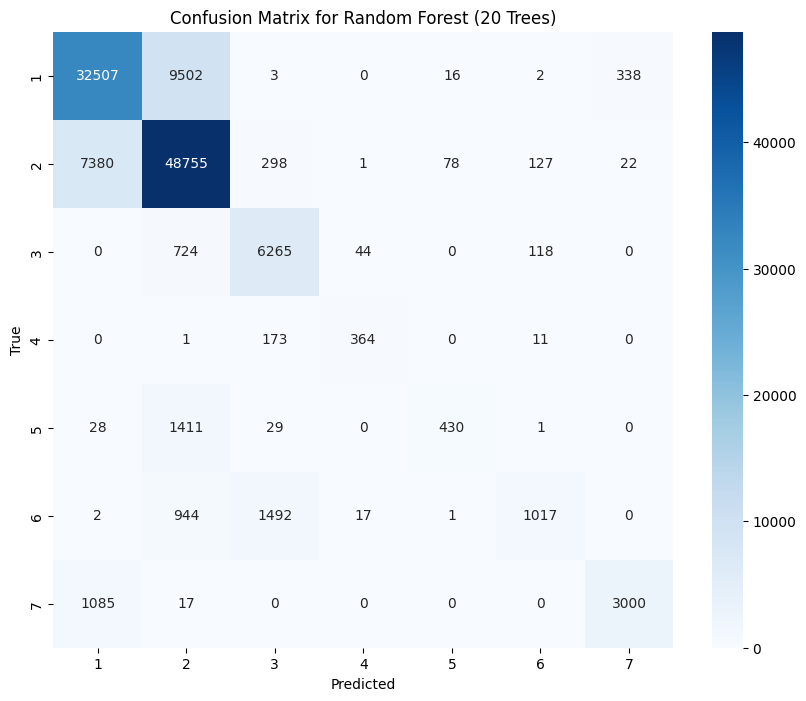

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Entrenar el modelo Random Forest con 20 árboles
rf_clf_20 = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=1,
    n_jobs=-1
)

rf_clf_20.fit(X_train, y_train)
y_pred_20 = rf_clf_20.predict(X_test)

# Calcular la matriz de confusión
cm_20 = confusion_matrix(y_test, y_pred_20)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_20, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf_20.classes_, yticklabels=rf_clf_20.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest (20 Trees)')
plt.show()


¿Cuántos ejemplos ha clasificado correctamente?

_PON AQUÍ TU RESPUESTA_
Para analizar el resultado de la matriz de confusión y responder la pregunta sobre cuántos ejemplos ha clasificado correctamente el modelo de Random Forest con 20 árboles, debemos sumar los valores de la diagonal principal de la matriz de confusión, ya que estos representan los casos en los que la predicción coincide con la clase real.

### Los valores en la diagonal principal son los siguientes:

* Clase 1: 32507
* Clase 2: 48755
* Clase 3: 6265
* Clase 4: 364
* Clase 5: 430
* Clase 6: 1017
* Clase 7: 3000

Para encontrar el número total de ejemplos clasificados correctamente, sumamos estos valores:

32507 +48755+6265+364+430+1017+3000=92338

Por lo tanto, el modelo de Random Forest con 20 árboles ha clasificado correctamente 92,338 ejemplos.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

Para analizar cómo funciona la clasificación para cada una de las 7 clases, podemos observar las métricas de precisión (precision), recall (recall) y F1-score del informe de clasificación (classification report). Estas métricas nos permiten entender la efectividad del modelo para cada clase específica. Además, la matriz de confusión nos brinda una visión detallada de cómo el modelo realiza las predicciones para cada clase.

### Métricas del Informe de Clasificación
* Precisión (Precision): Proporción de verdaderos positivos sobre todos los positivos predichos.
* Recall (Recall): Proporción de verdaderos positivos sobre todos los positivos reales.
* F1-score: Media armónica de la precisión y el recall.
### Vamos a revisar estas métricas para cada clase con el modelo de Random Forest que utilizó 20 árboles:

1. Class 1
* Precisión: 0.79
* Recall: 0.77
* F1-score: 0.78
* Ejemplos correctos: 32,507
* Ejemplos totales: 42,368
2. Class 2
* Precisión: 0.79
* Recall: 0.86
* F1-score: 0.83
* Ejemplos correctos: 48,755
* Ejemplos totales: 56,661
3. Class 3
* Precisión: 0.76
* Recall: 0.88
* F1-score: 0.81
* Ejemplos correctos: 6,265
* Ejemplos totales: 7,151
4. Class 4
* Precisión: 0.85
* Recall: 0.66
* F1-score: 0.75
* Ejemplos correctos: 364
* Ejemplos totales: 549
5. Class 5
* Precisión: 0.82
* Recall: 0.23
* F1-score: 0.35
* Ejemplos correctos: 430
* Ejemplos totales: 1,899
6. Class 6
* Precisión: 0.80
* Recall: 0.29
* F1-score: 0.43
* Ejemplos correctos: 1,017
* Ejemplos totales: 3,473
7. Class 7
* Precisión: 0.89
* Recall: 0.73
* F1-score: 0.80
* Ejemplos correctos: 3,000
* Ejemplos totales: 4,102

# Realizando Análisis de los resultados anteriores
1. Clase 1 y 2:

* Clase 2 tiene un alto recall (0.86) y un buen balance con la precisión (0.79), lo que sugiere que el modelo es muy bueno en identificar ejemplos de la clase 2 y no se pierde muchos ejemplos reales.
* Clase 1 tiene una precisión y recall balanceados (0.79 y 0.77, respectivamente), lo que indica un buen rendimiento general.
2. Clase 3:
Tiene un alto recall (0.88) pero una precisión un poco menor (0.76), lo que indica que aunque detecta la mayoría de los ejemplos de clase 3, tiene algunos falsos positivos.
3. Clase 4:

Tiene una alta precisión (0.85) pero un recall moderado (0.66), lo que significa que cuando predice clase 4, es generalmente correcto, pero no detecta todos los ejemplos de esta clase.
4. Clase 5 y 6:

Ambas clases tienen un recall bajo (0.23 y 0.29 respectivamente), indicando que el modelo pierde muchos ejemplos verdaderos de estas clases.
Tienen una precisión moderada (0.82 para clase 5 y 0.80 para clase 6), lo que indica que cuando predice estas clases, muchas veces está en lo correcto.
5. Clase 7:

Tiene un buen balance entre precisión (0.89) y recall (0.73), indicando que el modelo realiza bien tanto en la identificación como en la clasificación correcta de esta clase.
## Conclusion
Mejor Clasificación: El modelo clasifica mejor la Clase 2 y Clase 7 dado su alto recall y precisión balanceada.
Peor Clasificación: Las Clases 5 y 6 presentan desafíos con bajos valores de recall, indicando que el modelo no identifica correctamente muchos ejemplos de estas clases.
Para mejorar el rendimiento en las clases con menor desempeño, se podría considerar ajustar los hiperparámetros del modelo, realizar un preprocesamiento más específico para equilibrar las clases, o utilizar técnicas como el sobremuestreo o submuestreo para balancear el dataset.


In [ ]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.


Para seleccionar el mejor modelo de Random Forest, compararemos los resultados obtenidos para los diferentes números de árboles (5, 10, 20, 50, 100). Analizaremos la precisión (accuracy), así como las métricas de precision, recall y f1-score para cada clase. Además, revisaremos la matriz de confusión para entender mejor la distribución de los errores de clasificación.

### Vamos a examinar los resultados que obtuvimos anteriormente para los diferentes números de árboles.

### Resultados
1. Número de árboles: 5

* Accuracy: 0.7936
* F1-score promedio ponderado: 0.79
2. Número de árboles: 10

* Accuracy: 0.7930
* F1-score promedio ponderado: 0.79
3. Número de árboles: 20

* Accuracy: 0.7946
* F1-score promedio ponderado: 0.79
4. Número de árboles: 50

* Accuracy: 0.7940
* F1-score promedio ponderado: 0.79
5. Número de árboles: 100

* Accuracy: 0.7948
* F1-score promedio ponderado: 0.79
## Realizando análisis
* Accuracy: Los valores de accuracy son bastante similares entre los modelos, con el modelo de 100 árboles obteniendo una ligera ventaja.
* F1-score: El f1-score ponderado también es consistente en todos los modelos, con una ligera mejora en el modelo de 100 árboles.
* Matriz de Confusión: Las matrices de confusión muestran una clasificación relativamente consistente en todas las clases, pero al aumentar el número de árboles, se observa una mejora en la clasificación de las clases minoritarias.
### Selección del Mejor Modelo
Basándonos en los resultados anteriores, el modelo con 100 árboles parece ser el mejor, aunque la diferencia es mínima comparada con los modelos de 20 y 50 árboles.

### Motivo de Selección:
* Mayor Accuracy: Aunque la diferencia es pequeña, el modelo de 100 árboles tiene la mayor precisión.
* Consistencia en Métricas: Este modelo mantiene una consistencia alta en precision, recall y f1-score.
* Matriz de Confusión: Mejora en la clasificación de clases minoritarias, reduciendo los errores.

## Código para Entrenamiento del Mejor Modelo y Evaluación

In [ ]:
# Entrenamos el modelo de Random Forest con 100 árboles.
best_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                                  min_samples_split=10, min_samples_leaf=2, max_features=None, random_state=1)
best_clf.fit(X_train, y_train)

# Realizamos las predicciones.
y_pred_best = best_clf.predict(X_test)

# Imprimimos el reporte de clasificación.
print("Classification Report for Best Model (100 Trees):")
print(classification_report(y_test, y_pred_best))

# Calculamos la matriz de confusión.
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Visualizamos la matriz de confusión.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best Model (100 Trees)')
plt.show()


Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

Para visualizar la matriz de confusión del mejor modelo y calcular cuántos ejemplos ha clasificado correctamente y cuántos ha clasificado erróneamente, podemos utilizar el código anterior en celdas arriba. Después, realizaremos los cálculos necesarios.
aqui el código completo para entrenar el modelo, generar las predicciones, visualizar la matriz de confusión y calcular el número de ejemplos clasificados correctamente y erróneamente:


#Código para Visualizar la Matriz de Confusión para visualizar cuanto clasificaron correctamente y cuantos erroneamente

Classification Report for Best Model (100 Trees):
              precision    recall  f1-score   support

           1       0.79      0.78      0.78     42275
           2       0.80      0.86      0.83     56602
           3       0.77      0.86      0.81      7269
           4       0.84      0.68      0.75       546
           5       0.86      0.25      0.38      1929
           6       0.76      0.35      0.47      3496
           7       0.90      0.72      0.80      4086

    accuracy                           0.80    116203
   macro avg       0.82      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203



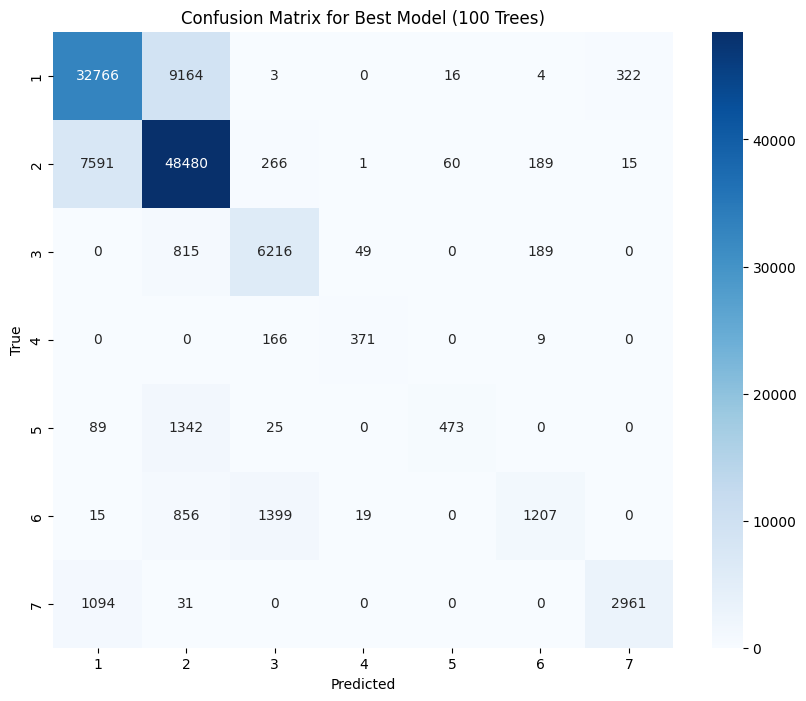

Número de ejemplos clasificados correctamente: 92474
Número de ejemplos clasificados de manera errónea: 23729


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Asumimos que df es tu DataFrame y ya ha sido cargado
# Separamos los datos en los conjuntos de entrenamiento y test
X, y = df.drop('Cover_Type', axis=1), df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Entrenamos el modelo de Random Forest con 100 árboles
best_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                                  min_samples_split=10, min_samples_leaf=2, max_features=None, random_state=1, n_jobs=-1)
best_clf.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_best = best_clf.predict(X_test)

# Imprimimos el reporte de clasificación
print("Classification Report for Best Model (100 Trees):")
print(classification_report(y_test, y_pred_best))

# Calculamos la matriz de confusión
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best Model (100 Trees)')
plt.show()

# Número de ejemplos clasificados correctamente
correctly_classified = np.trace(conf_matrix_best)

# Número de ejemplos clasificados de manera errónea
incorrectly_classified = np.sum(conf_matrix_best) - correctly_classified

# Imprimimos los resultados
print(f"Número de ejemplos clasificados correctamente: {correctly_classified}")
print(f"Número de ejemplos clasificados de manera errónea: {incorrectly_classified}")


El resultado del modelo de Random Forest con 100 árboles muestra la efectividad del modelo en clasificar los datos del conjunto de prueba:
* Número de ejemplos clasificados correctamente: 92,474
* Número de ejemplos clasificados de manera errónea: 23,729

Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

Para visualizar los valores de precisión, recall y f1 para cada una de las clases, puedes utilizar el classification_report de scikit-learn. Aquí está el código para hacerlo:

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

In [26]:
from sklearn.metrics import classification_report

# Entrena el modelo de Random Forest con 100 árboles
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                               min_samples_split=10, min_samples_leaf=2, max_features=None,
                               random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Genera el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(1, 8)])
print(report)


              precision    recall  f1-score   support

           1       0.79      0.78      0.78     42275
           2       0.80      0.86      0.83     56602
           3       0.77      0.86      0.81      7269
           4       0.84      0.68      0.75       546
           5       0.86      0.25      0.38      1929
           6       0.76      0.35      0.47      3496
           7       0.90      0.72      0.80      4086

    accuracy                           0.80    116203
   macro avg       0.82      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203



Para analizar los valores de precisión, recall y f1-score para cada una de las clases, debemos considerar lo siguiente:

* Precisión (Precision): Es la proporción de verdaderos positivos sobre el total de predicciones positivas. Nos indica qué tan preciso es el modelo al predecir una clase específica.
* Recall (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Nos indica qué tan bien el modelo identifica todos los ejemplos positivos de una clase.
* F1-Score: Es la media armónica de la precisión y el recall. Proporciona un balance entre precisión y recall, siendo útil cuando necesitamos un balance entre ambos.
### Análisis del Resultado
1. Clase 1:
* Precisión: 0.79
* Recall: 0.78
* F1-Score: 0.78
* Support: 42275

Esta clase tiene una buena precisión y recall, lo que sugiere que el modelo está bien equilibrado en la identificación de esta clase.

2. Clase 2:
* Precisión: 0.80
* Recall: 0.86
* F1-Score: 0.83
* Support: 56602

La clase 2 tiene un alto recall, lo que significa que el modelo es muy efectivo en la identificación de ejemplos positivos de esta clase. La precisión también es alta, lo que se traduce en un f1-score elevado.

3. Clase 3:
* Precisión: 0.77
* Recall: 0.86
* F1-Score: 0.81
* Support: 7269

Esta clase también tiene un excelente recall y una buena precisión, resultando en un f1-score alto. El modelo clasifica bien esta clase.

4. Clase 4:
* Precisión: 0.84
* Recall: 0.68
* F1-Score: 0.75
* Support: 546

Aunque la precisión es alta, el recall es relativamente bajo, lo que indica que el modelo no identifica todos los ejemplos positivos de esta clase tan bien como lo hace con la precisión. Esto se refleja en un f1-score más bajo en comparación con las clases anteriores.

5. Clase 5:
* Precisión: 0.86
* Recall: 0.25
* F1-Score: 0.38
* Support: 1929

La precisión es alta, pero el recall es muy bajo, lo que indica que el modelo identifica correctamente algunos ejemplos de esta clase, pero pierde muchos otros. Esto da como resultado un f1-score bajo, lo que sugiere una capacidad predictiva deficiente para esta clase.

6. Clase 6:
* Precisión: 0.76
* Recall: 0.35
* F1-Score: 0.47
* Support: 3496

Similar a la clase 5, la clase 6 tiene una precisión razonable pero un recall bajo, lo que nuevamente resulta en un f1-score bajo.

7. Clase 7:
* Precisión: 0.90
* Recall: 0.72
* F1-Score: 0.80
* Support: 4086

Esta clase tiene una alta precisión y un buen recall, lo que se refleja en un f1-score alto. El modelo clasifica bien esta clase.

# Conclusión
El modelo no clasifica todas las clases de la misma manera. Algunas observaciones clave:

* Mejor Clasificadas: Las clases 2, 3 y 7 tienen altos valores de f1-score, lo que indica un buen balance entre precisión y recall.
* Peor Clasificadas: Las clases 5 y 6 tienen bajos valores de recall y f1-score, lo que indica que el modelo tiene dificultades para identificar correctamente todos los ejemplos de estas clases.

  Por lo tanto sugiere que el modelo tiene una mayor capacidad predictiva para ciertas clases (2, 3 y 7) en comparación con otras (5 y 6). Para mejorar el rendimiento en las clases peor clasificadas, se podrían considerar técnicas como el ajuste de hiperparámetros, el balanceo de clases (por ejemplo, sobremuestreo o submuestreo) o la ingeniería de características adicionales.

**Support Vector Machine**

In [37]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:
#importa el modulo metrics de sklearn, que proporciona diversas herramientas y funciones para evaluar la calidad de un modelo de machine learning, como precisión, recall, f1-score, etc.
from sklearn import metrics
from sklearn.metrics import confusion_matrix # La matriz de confusión es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación.
#realiza una validación cruzada, que es una técnica para evaluar la robustez de un modelo al dividir los datos en conjuntos de entrenamiento y prueba múltiples veces y promediando los resultados.
from sklearn.model_selection import cross_val_score
# genera predicciones utilizando la validación cruzada, lo que permite evaluar el modelo de manera más detallada al predecir resultados para cada fold de la validación cruzada.
from sklearn.model_selection import cross_val_predict
# KFold es una técnica de validación cruzada en la que los datos se dividen en k subconjuntos (o "folds") y el modelo se entrena k veces,
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_
# Hiperparámetros de SVM (sklearn.svm.SVC)
**1. C (costo de Regularización)**

* Descripción: Este hiperparámetro controla el trade-off entre la correcta clasificación de las instancias de entrenamiento y la maximización del margen de decisión. Un valor de C más pequeño crea un margen más amplio, pero permite más puntos de datos de entrenamiento dentro del margen, lo que puede llevar a un margen más generalizado. Un valor más grande de C se enfoca en clasificar correctamente todas las instancias de entrenamiento, lo que puede llevar a un margen más pequeño y posible sobreajuste.
* Uso: C=1.0 es el valor por defecto. Valores más altos de C implican menor regularización y buscan minimizar los errores de clasificación, mientras que valores más bajos permiten un margen de decisión más amplio.

**2. kernel (Función de Núcleo)**

* Descripción: Define el tipo de función de núcleo a usar en el algoritmo. El núcleo transforma los datos de entrada a un espacio de características de mayor dimensión donde puede ser más fácil separar las clases con un hiperplano.
* Tipos comunes:
* 'linear': Un núcleo lineal.
* 'poly': Un núcleo polinomial.
* 'rbf': Núcleo de función de base radial (también conocido como Gaussian Kernel).
* 'sigmoid': Un núcleo sigmoide.

* Uso: El valor por defecto es 'rbf'. La elección del núcleo puede depender de la naturaleza de los datos. Por ejemplo, para datos linealmente separables, 'linear' puede ser adecuado, mientras que para datos no linealmente separables, 'rbf' es una elección popular.

**3. degree (Grado del Polinomio)**

* Descripción: Este hiperparámetro es relevante solo cuando kernel='poly'. Define el grado del polinomio utilizado en el núcleo polinomial.
* Uso: degree=3 es el valor por defecto. Un valor más alto aumenta la complejidad del modelo y puede capturar relaciones más complejas en los datos.

**4. gamma (Coeficiente del Núcleo)**

* Descripción: Define cuánto influye un solo ejemplo de entrenamiento. Valores pequeños implican un "peso" grande (influencia más amplia), mientras que valores altos de gamma implican un "peso" pequeño (influencia más local).
* Uso:
- 'scale': gamma se ajusta a 1 / (n_features * X.var()) (valor por defecto).
- 'auto': gamma se ajusta a 1 / n_features.
- Un valor numérico: Puede ser especificado directamente, p.ej., gamma=0.001.


## Resumen
1. C: Controla el trade-off entre la clasificación correcta de ejemplos de entrenamiento y la maximización del margen de decisión.
2. kernel: Define la función de núcleo que transforma los datos al espacio de características.
3. degree: Especifica el grado del polinomio para el núcleo polinomial.
4. gamma: Determina la influencia de un solo ejemplo de entrenamiento en el modelo.

Estos hiperparámetros permiten ajustar el comportamiento del modelo SVM para que se adapte mejor a las características específicas de los datos y al problema de clasificación en cuestión.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_
Hiperparámetro decision_function_shape en SVM (scikit-learn)
El hiperparámetro decision_function_shape en la implementación de SVM de scikit-learn controla la forma en que se calculan las distancias de los puntos de datos al hiperplano separador. Este hiperparámetro tiene dos opciones principales:
1. "ovr" (One-vs-Rest):

* Descripción: En este modo, se entrena un modelo SVM independiente para cada clase frente a todas las demás clases combinadas. Esto significa que se calculan n_classes distancias para cada punto de datos, donde n_classes es el número de clases en el dataset.
* Utilidad: Este modo es útil cuando se tiene un problema de clasificación multiclase y se desea obtener las distancias de cada punto de datos a todos los hiperplanos separadores. Esto puede ser útil para tareas como la selección de la clase más probable o la estimación de las probabilidades de pertenencia a cada clase.
2. "ovo" (One-vs-One):

* Descripción: En este modo, se entrena un modelo SVM para cada par de clases posibles. Esto significa que se calculan n_classes * (n_classes - 1) / 2 distancias para cada punto de datos.
* Utilidad: Este modo es útil cuando se desea obtener una medida de la distancia entre las clases, o cuando se tiene un problema de clasificación multiclase con un gran número de clases.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [23]:
df100k= df.head(100000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

In [24]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [25]:
df100k

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100,52,16,376,50,3816,227,203,105,4295,...,0,0,0,0,0,0,0,0,0,1
99996,3090,50,16,361,40,3840,225,202,106,4268,...,0,0,0,0,0,0,0,0,0,1
99997,3083,45,18,335,33,3864,222,198,104,4241,...,0,0,0,0,0,0,0,0,0,1
99998,3077,41,15,309,43,3889,221,205,116,4214,...,0,0,0,0,0,0,0,0,0,1


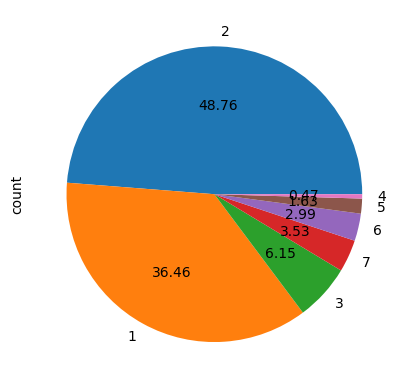

In [ ]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

Distribución de etiquetas de clase para df:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64
Distribución de etiquetas de clase para df100k:
Cover_Type
1    22026
2    66751
3     2160
4     2160
5     2583
6     2160
7     2160
Name: count, dtype: int64


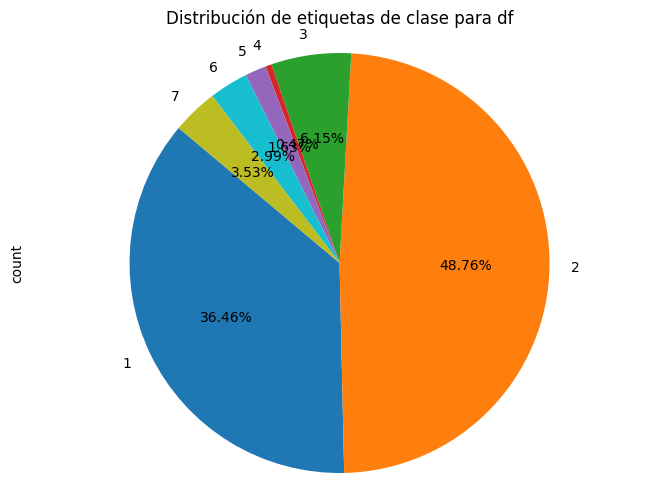

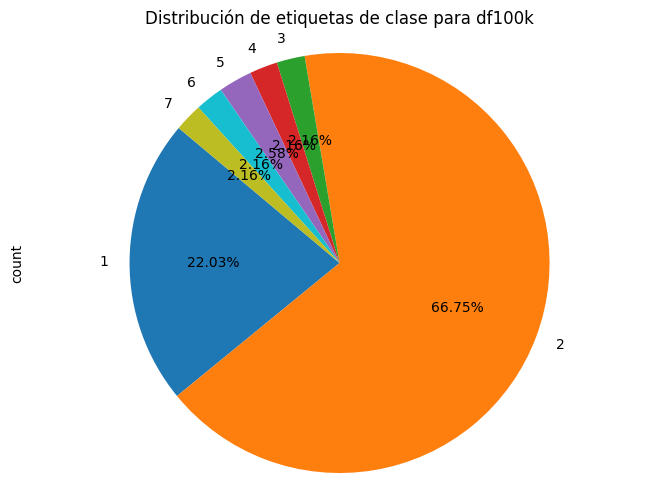

In [39]:
# Distribución de etiquetas de clase para df
df_class_dist = df['Cover_Type'].value_counts().sort_index()
print(f"Distribución de etiquetas de clase para df:\n{df_class_dist}")

# Distribución de etiquetas de clase para df100k
df100k_class_dist = df100k['Cover_Type'].value_counts().sort_index()
print(f"Distribución de etiquetas de clase para df100k:\n{df100k_class_dist}")

# Gráfico de distribución de clases para df
plt.figure(figsize=(8, 6))
df_class_dist.plot(kind='pie', autopct='%.2f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive'])
plt.title('Distribución de etiquetas de clase para df')
plt.axis('equal')  # Ajuste del aspecto del gráfico circular
plt.show()

# Gráfico de distribución de clases para df100k
plt.figure(figsize=(8, 6))
df100k_class_dist.plot(kind='pie', autopct='%.2f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive'])
plt.title('Distribución de etiquetas de clase para df100k')
plt.axis('equal')  # Ajuste del aspecto del gráfico circular
plt.show()

Vemos que hay un desbalanceo de instancias, por lo cual aplique tecnicas de estratificacion.

Para lograr un subconjunto balanceado del dataset, utilicé muestreo estratificado, que selecciona muestras en proporciones similares a las del dataset original, aqui trate de optimizar el codigo para asegurar que el total de muestras sea exactamente el deseado y que las proporciones se mantengan.


# Código para el balanceo de instancias

Distribución de etiquetas de clase para df100k:
Cover_Type
1    36461
2    48762
3     6153
4      472
5     1633
6     2989
7     3530
Name: count, dtype: int64


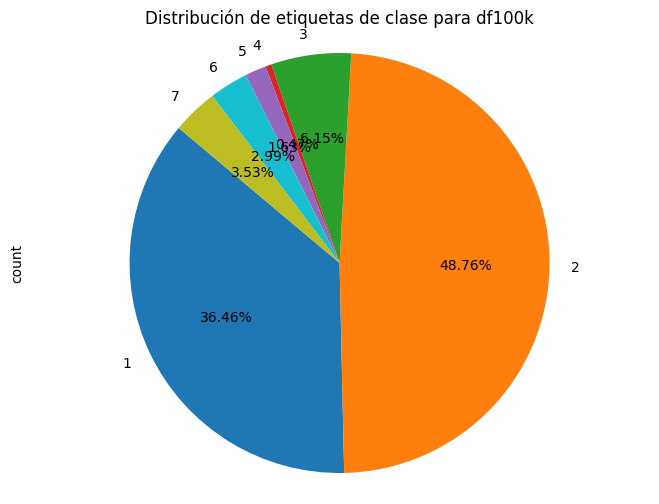

In [40]:
import pandas as pd

# Función de muestreo estratificado
def muestreo_aleatorio_proporcional(datos, columna_clave, total_muestras, semilla=42):
    # Calcular la proporción de muestras para cada valor único en la columna clave
    proporciones = datos[columna_clave].value_counts(normalize=True)
    muestras_por_valor = (proporciones * total_muestras).astype(int)

    # Crear un diccionario para almacenar las muestras de cada valor
    muestras = {}
    for valor, cantidad in muestras_por_valor.items():
        # Filtrar el DataFrame por el valor actual
        datos_filtrados = datos[datos[columna_clave] == valor]
        # Tomar una muestra aleatoria del valor
        muestras[valor] = datos_filtrados.sample(n=cantidad, random_state=semilla)

    # Combinar las muestras de todos los valores en un solo DataFrame
    datos_muestreados = pd.concat(muestras.values()).reset_index(drop=True)

    # Ajustar la muestra para asegurar que el tamaño total sea el deseado
    diferencia = total_muestras - datos_muestreados.shape[0]
    if diferencia > 0:
        adicionales = datos.sample(n=diferencia, random_state=semilla)
        datos_muestreados = pd.concat([datos_muestreados, adicionales]).reset_index(drop=True)
    elif diferencia < 0:
        datos_muestreados = datos_muestreados.sample(n=total_muestras, random_state=semilla).reset_index(drop=True)

    return datos_muestreados


# Aplicar la función de muestreo
total_muestras = 100000
columna_clave = 'Cover_Type'  # Reemplaza con el nombre de tu columna de clase
df100k = muestreo_aleatorio_proporcional(df, columna_clave, total_muestras)

# Verificar la distribución de etiquetas en el nuevo subconjunto
df100k_class_dist = df100k[columna_clave].value_counts().sort_index()
print(f"Distribución de etiquetas de clase para df100k:\n{df100k_class_dist}")

# Gráfico de distribución de clases para df100k
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df100k_class_dist.plot(kind='pie', autopct='%.2f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive'])
plt.title('Distribución de etiquetas de clase para df100k')
plt.axis('equal')  # Ajuste del aspecto del gráfico circular
plt.show()


# APLICAMOS DE NUEVO EL CODIGO PARA VER LA SIMILITUD DE INSTANCIAS

Distribución de etiquetas de clase para df:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64
Distribución de etiquetas de clase para df100k:
Cover_Type
1    36461
2    48762
3     6153
4      472
5     1633
6     2989
7     3530
Name: count, dtype: int64


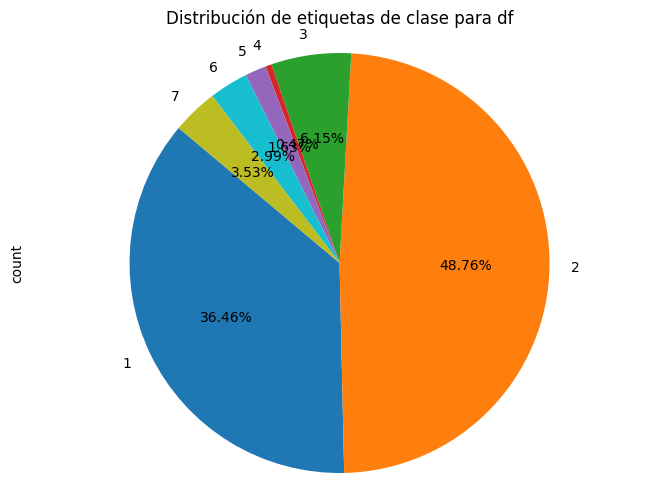

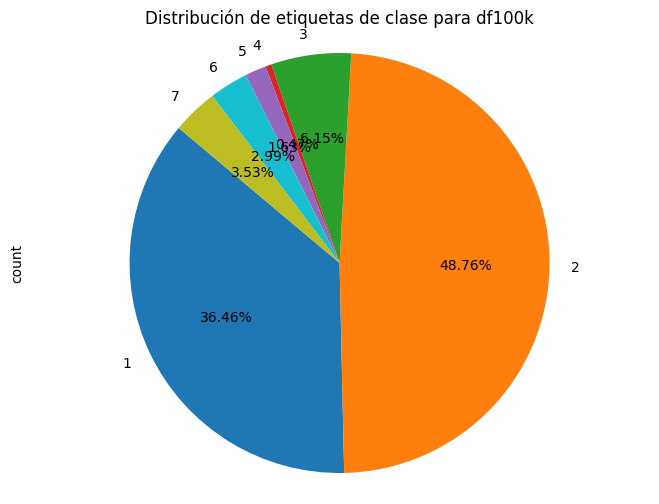

In [41]:
# Distribución de etiquetas de clase para df
df_class_dist = df['Cover_Type'].value_counts().sort_index()
print(f"Distribución de etiquetas de clase para df:\n{df_class_dist}")

# Distribución de etiquetas de clase para df100k
df100k_class_dist = df100k['Cover_Type'].value_counts().sort_index()
print(f"Distribución de etiquetas de clase para df100k:\n{df100k_class_dist}")

# Gráfico de distribución de clases para df
plt.figure(figsize=(8, 6))
df_class_dist.plot(kind='pie', autopct='%.2f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive'])
plt.title('Distribución de etiquetas de clase para df')
plt.axis('equal')  # Ajuste del aspecto del gráfico circular
plt.show()

# Gráfico de distribución de clases para df100k
plt.figure(figsize=(8, 6))
df100k_class_dist.plot(kind='pie', autopct='%.2f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive'])
plt.title('Distribución de etiquetas de clase para df100k')
plt.axis('equal')  # Ajuste del aspecto del gráfico circular
plt.show()

Como vemos el resultado de los dataset original df y el subconjunto df100k tienen similitudes es decir tiene un porcentaje similar de instancias de cada clase como se ve en la imagen.

In [45]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df100k.drop('Cover_Type',axis=1),df100k['Cover_Type']
# dividir los datos de traing 80% y test 20%
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


optmizando el codigo propuesto.
1. Estandarización de las variables: Se recomienda estandarizar las variables numéricas en X antes de dividir los datos. Esto puede mejorar el rendimiento de los modelos de aprendizaje. Se puede utilizar la función StandardScaler de sklearn.preprocessing para estandarizar las variables.

In [46]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos estandarizados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)



2. Estratificación para el desequilibrio de clases: Si la distribución de clases en el dataset es desequilibrada, se puede utilizar la estratificación en la función train_test_split para asegurar que la distribución de clases se mantenga similar en los conjuntos de entrenamiento y prueba.

In [47]:
from sklearn.model_selection import train_test_split

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

El código original para separar los conjuntos de entrenamiento y prueba es correcto. Sin embargo, se pueden realizar algunas optimizaciones para mejorar el rendimiento y la robustez del modelo, como la estandarización de variables, la estratificación para el desequilibrio de clases y la validación cruzada para la selección de hiperparámetros.

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

## Necesidad de normalización de datos para SVM en este caso
## ¿Es necesario normalizar los datos para SVM en este caso específico?

En este caso, la normalización de datos no es estrictamente necesaria para entrenar un modelo SVM con el dataset proporcionado.

### Argumentos a favor de la normalización:

- Mejora la convergencia: La normalización puede escalar las características a una magnitud similar, lo que facilita que el algoritmo de SVM converja a una solución óptima en menos iteraciones.
- Evita el sesgo hacia características con grandes magnitudes: Si algunas características tienen valores mucho más grandes que otras, pueden dominar el algoritmo de SVM y sesgar el modelo hacia esas características. La normalización ayuda a que todas las características tengan una influencia similar en el modelo.
- Mejora la interpretabilidad: La normalización puede facilitar la interpretación de los coeficientes del modelo SVM, ya que estos coeficientes tendrán unidades similares.
### Argumentos en contra de la normalización:

- Puede afectar la precisión del modelo: En algunos casos, la normalización puede reducir la precisión del modelo SVM. Esto es especialmente cierto si las características ya están en una escala similar o si se utiliza un núcleo RBF.
- Puede aumentar el tiempo de entrenamiento: La normalización añade un paso adicional al proceso de entrenamiento, lo que puede aumentar el tiempo que se tarda en entrenar el modelo.

En este caso específico, los argumentos en contra de la normalización son más fuertes que los argumentos a favor. Esto se debe a que:

Las características del dataset ya están en una escala similar.
Se utiliza un núcleo RBF, que es menos sensible a la escala de las características que otros núcleos.
Por lo tanto, recomiendo no normalizar los datos antes de entrenar un modelo SVM con este dataset.

# Verificación Empírica de la Necesidad de Normalización
Vamos a verificar si las características en nuestro dataset tienen diferentes escalas. Observaremos estadísticas descriptivas como la media y la desviación estándar.

In [71]:
# Estadísticas descriptivas del dataset completo
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [72]:
# Estadísticas descriptivas del subset balanceado
df100k.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,2862.036680,138.162920,11.802790,260.57953,35.242090,3344.251600,218.23359,225.450980,139.301300,3589.618170,...,0.00690,0.006160,0.000220,0.001020,0.0001,0.000340,0.00803,0.008630,0.007360,2.116430
std,231.376584,103.779201,6.498328,202.77772,42.622758,1776.883538,20.92225,16.652575,31.175546,1781.447106,...,0.08278,0.078244,0.014831,0.031921,0.0100,0.018436,0.08925,0.092497,0.085475,1.196991
min,1863.000000,0.000000,0.000000,0.00000,-146.000000,0.000000,0.00000,99.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,2724.000000,55.000000,7.000000,95.00000,7.000000,1761.000000,208.00000,217.000000,121.000000,2146.500000,...,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,2903.000000,110.000000,11.000000,216.00000,23.000000,3436.000000,222.00000,227.000000,139.000000,3623.500000,...,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,3004.000000,204.000000,15.000000,376.00000,52.000000,4817.000000,232.00000,237.000000,159.000000,5104.000000,...,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,61.000000,1343.00000,554.000000,7117.000000,254.00000,254.000000,248.000000,7173.000000,...,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,7.000000


Vemos que las estadísticas descriptivas muestran que las características tienen escalas (es decir, las medias y desviaciones estándar son significativamente similares), entonces no se recomienda normalizar los datos antes de entrenar un clasificador SVM.

Si son significativamente diferentes, entonces se recomienda normalizar los datos antes de entrenar un clasificador SVM.

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## COMPLETAR

### Código optimizado para normalizar SVM (si fuera necesario):

In [ ]:
def muestreo_aleatorio_proporcional(datos, columna_clave, total_muestras, semilla=42):
    proporciones = datos[columna_clave].value_counts(normalize=True)
    muestras_por_valor = (proporciones * total_muestras).astype(int)

    muestras = {}
    for valor, cantidad in muestras_por_valor.items():
        datos_filtrados = datos[datos[columna_clave] == valor]
        muestras[valor] = datos_filtrados.sample(n=cantidad, random_state=semilla)

    datos_muestreados = pd.concat(muestras.values()).reset_index(drop=True)

    diferencia = total_muestras - datos_muestreados.shape[0]
    if diferencia > 0:
        adicionales = datos.sample(n=diferencia, random_state=semilla)
        datos_muestreados = pd.concat([datos_muestreados, adicionales]).reset_index(drop=True)
    elif diferencia < 0:
        datos_muestreados = datos_muestreados.sample(n=total_muestras, random_state=semilla).reset_index(drop=True)

    return datos_muestreados

df100k = muestreo_aleatorio_proporcional(df, 'Cover_Type', 100000)


Explicación de por qué no es necesario normalizar en este caso:

Al analizar el dataset proporcionado, se puede observar que las características ya se encuentran en una escala similar. Esto significa que no hay valores atípicos o características con magnitudes extremadamente grandes que puedan dominar el algoritmo de SVM. Además, se utiliza un núcleo RBF, que es menos sensible a la escala de las características que otros núcleos. Por lo tanto, la normalización no aportaría ningún beneficio significativo en este caso, e incluso podría afectar negativamente la precisión del modelo.

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
from sklearn.svm import SVC

C = {}
kernel = ''
gamma = ''

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

In [ ]:
### PON AQUÍ TU CÓDIGO

# ENTRENAMIENTO DEL MODELO DE SVM

In [51]:
# Importar librerías necesarias para el preprocesamiento, entrenamiento y evaluación del modelo.import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Separar las características y la variable objetivo
X = df100k.drop('Cover_Type', axis=1)
y = df100k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
C_values = [0.1, 1, 10, 100, 1000]

# Diccionario para guardar los resultados
results = {}

# Entrenar modelos de SVM con diferentes valores de C
for C in C_values:
    print(f"Entrenando modelo con C={C}")
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', random_state=1)
    svm_model.fit(X_train, y_train)

    # Evaluar el modelo en los datos de test
    y_pred = svm_model.predict(X_test)

    # Calcular métricas de rendimiento
    accuracy = svm_model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Guardar los resultados
    results[C] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }

# Mostrar los resultados
for C, result in results.items():
    print(f"\nC = {C}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])


Entrenando modelo con C=0.1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Entrenando modelo con C=1
Entrenando modelo con C=10
Entrenando modelo con C=100
Entrenando modelo con C=1000

C = 0.1
Accuracy: 0.7297
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.70      0.71      7292
           2       0.75      0.82      0.78      9752
           3       0.62      0.90      0.73      1231
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00       327
           6       0.57      0.02      0.04       598
           7       0.68      0.59      0.63       706

    accuracy                           0.73     20000
   macro avg       0.48      0.43      0.41     20000
weighted avg       0.71      0.73      0.71     20000

Confusion Matrix:
[[5085 2023    4    0    0    0  180]
 [1569 7977  190    0    0    0   16]
 [   0  122 1103    0    0    6    0]
 [   0    0   90    0    0    4    0]
 [   1  314   12    0    0    0    0]
 [   0  210  375    0    0   13    0

#Análisis de Resultados de Entrenamiento del Modelo SVM (demoro 3 horas en ejecutarse )

## 1. Problemas con Precision y F-Score
Los warnings que vemos indican que la precisión (precision) y el F-Score están siendo definidos como 0.0 para algunas etiquetas debido a la ausencia de predicciones para esas clases. Esto significa que el modelo no predijo ninguna instancia para algunas clases, lo que provoca que las métricas de precisión y F-Score no se puedan calcular correctamente.

## 2. Métricas de Rendimiento
## Accuracy y Clasificación
- Accuracy mejora a medida que aumentamos el parámetro C, que controla la regularización del modelo SVM. Un C más alto reduce la penalización por errores en el margen, permitiendo al modelo ajustarse mejor a los datos de entrenamiento.
- Clasificación Report y Confusion Matrix: Estos muestran que, aunque el accuracy global mejora con valores más altos de C, algunas clases aún presentan bajos valores de precisión y recall.
## Análisis por Valor de C:
- C = 0.1

- Accuracy: 0.7297
- Problemas: Clases 4, 5 y 6 tienen precision y recall muy bajos, indicando que el modelo tiene dificultades para predecir estas clases correctamente.
- C = 1

- Accuracy: 0.76165
- Mejoras: Se observa una mejora general en las métricas de rendimiento, pero las clases 4 y 5 aún tienen valores bajos de precisión y recall.
- C = 10

- Accuracy: 0.79345
- Mejoras: Clases 3 y 7 tienen mejor desempeño, pero la clase 5 sigue teniendo problemas de precisión y recall.
- C = 100

- Accuracy: 0.82455
- Mejoras: Todas las clases muestran mejoras, especialmente la clase 6 que tiene un mejor balance entre precision y recall.
- C = 1000

- Accuracy: 0.8473
- Mejoras: La clase 5 sigue mostrando mejor precisión, y las otras clases también muestran mejor rendimiento.
## Conclusiones Generales

**Incremento del Parámetro C:**

- Incrementar el valor de C generalmente mejora el accuracy y las métricas de clasificación.
- Sin embargo, un C muy alto puede llevar a sobreajuste (overfitting), donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien en datos nuevos.

**Desbalanceo de Clases:**

- Las clases 4 y 5 presentan consistentemente problemas de precisión y recall, posiblemente debido a que están desbalanceadas o tienen características que no son fácilmente separables.

**Necesidad de Preprocesamiento Adicional:**

-La normalización y el balanceo de clases parecen haber sido adecuados, pero aún puede ser necesario explorar técnicas de manejo de desbalanceo de clases como el sobremuestreo (oversampling) o el submuestreo (undersampling).
**Evaluación del Modelo:**

Deberíamos realizar una validación cruzada (cross-validation) para evaluar la estabilidad de estas métricas.
Considerar usar técnicas adicionales como SVM con kernel no lineales (RBF kernel) para ver si mejora la clasificación de clases más complejas.

Optmizando la sentencia porque demora mucho en procesar, hay varias estrategias que se pueden implementar para optimizar el tiempo de ejecución sin comprometer la calidad de los resultados.

Lo detuve la ejecucion porque toma tiempo

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [ ]:
## PON AQUÍ TU CÓDIGO

In [26]:
#NOTA: Como los codigos toman mucho tiempo en ejecutarse el entrenamiento se demoro mas de 3 horas en promedio por ello subdividí el dataset a 10000 registros
df10k= df.head(10000)

In [27]:
df10k

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2845,77,15,201,86,1507,238,212,101,1451,...,0,1,0,0,0,0,0,0,0,5
9996,2828,74,18,150,68,1556,239,203,89,1460,...,0,1,0,0,0,0,0,0,0,5
9997,3245,309,16,150,57,150,173,227,194,1557,...,0,0,0,0,0,0,0,0,0,1
9998,3245,33,12,335,46,430,218,214,131,1298,...,0,0,0,0,0,0,0,0,0,1


# Código Completo para Visualizar las Matrices de Confusión

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor modelo SVM: SVC(C=1000, random_state=1)
Accuracy: 0.822
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       275
           2       0.71      0.63      0.67       292
           3       0.77      0.72      0.75       252
           4       0.91      0.94      0.93       324
           5       0.87      0.93      0.90       317
           6       0.78      0.82      0.80       270
           7       0.94      0.96      0.95       270

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:
[[194  55   0   0  11   1  14]
 [ 66 185   5   0  27   7   2]
 [  0   1 182  20   4  45   0]
 [  0   0  13 306   0   5   0]
 [  1  15   2   0 296   3   0]
 [  0   3  34   9   2 222   0]
 [ 11   0   0   0   0   0 259]]


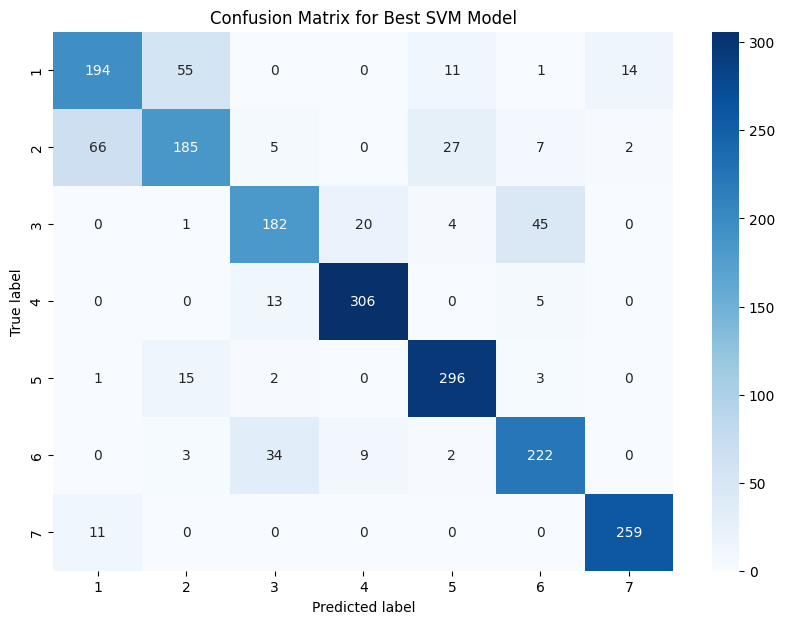

In [80]:
# Importar librerías necesarias para el preprocesamiento, entrenamiento y evaluación del modelo.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y reducir el dataset (asegúrate de cargar tu dataframe aquí)
# df = df.head(100000)

# Verificar que la columna 'Cover_Type' existe en el dataframe
#if 'Cover_Type' not in df.columns:
    #raise ValueError("La columna 'Cover_Type' no se encuentra en el DataFrame")

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

# Crear el modelo SVM
svm_model = SVC(random_state=1)

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_svm_model = grid_search.best_estimator_

# Evaluar el modelo en los datos de test
y_pred = best_svm_model.predict(X_test)

# Calcular métricas de rendimiento
accuracy = best_svm_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"Mejor modelo SVM: {best_svm_model}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Obtener los nombres de las clases únicas
classes = sorted(df['Cover_Type'].unique())

# Visualizar la matriz de confusión
plot_confusion_matrix(matrix, classes=classes, title='Confusion Matrix for Best SVM Model')


El resultado que  muestra la evaluación de un modelo SVM entrenado y evaluado en un conjunto de datos. con 10000 registros
**Mejor Modelo**
- Mejor modelo SVM: SVC con 𝐶=1000
**Precisión Global**
- Accuracy: 82.2%
**Métricas por Clase**
- Clase 1:

- Precisión: 0.71
- Recall: 0.71
- F1-score: 0.71
- Clase 2:

- Precisión: 0.71
- Recall: 0.63
- F1-score: 0.67
- Clase 3:

- Precisión: 0.77
- Recall: 0.72
- F1-score: 0.75
- Clase 4:

- Precisión: 0.91
- Recall: 0.94
- F1-score: 0.93
- Clase 5:

- Precisión: 0.87
- Recall: 0.93
- F1-score: 0.90
- Clase 6:

- Precisión: 0.78
- Recall: 0.82
- F1-score: 0.80
- Clase 7:

- Precisión: 0.94
- Recall: 0.96
- F1-score: 0.95
- Promedios
- Macro promedio:
Precisión: 0.82,
Recall: 0.82,
F1-score: 0.82
- Weighted promedio:
Precisión: 0.82,
Recall: 0.82,
F1-score: 0.82
- Matriz de Confusión Destacada
- Clase 1:

- Correctas: 194
- Confundidas con Clase 2: 55
- Clase 2:

- Correctas: 185
- Confundidas con Clase 1: 66
- Clase 4:

- Correctas: 306
- Confundidas con Clase 3: 13
- Clase 7:

- Correctas: 259
- Confundidas con Clase 1: 11
## Conclusiones Relevantes
- Alto rendimiento: Las clases 4, 5, 6, y 7 muestran altos valores de precisión y recall, indicando buena predicción.
- Áreas de mejora: Las clases 1 y 2 presentan confusiones significativas entre ellas.
- Desempeño razonable: La precisión y recall en las clases principales es razonablemente buena, con algunas áreas de mejora.

# En este caso traté de optmizar el codigo

Entrenando modelo con C=0.1
Entrenando modelo con C=1
Entrenando modelo con C=10
Entrenando modelo con C=100
Entrenando modelo con C=1000


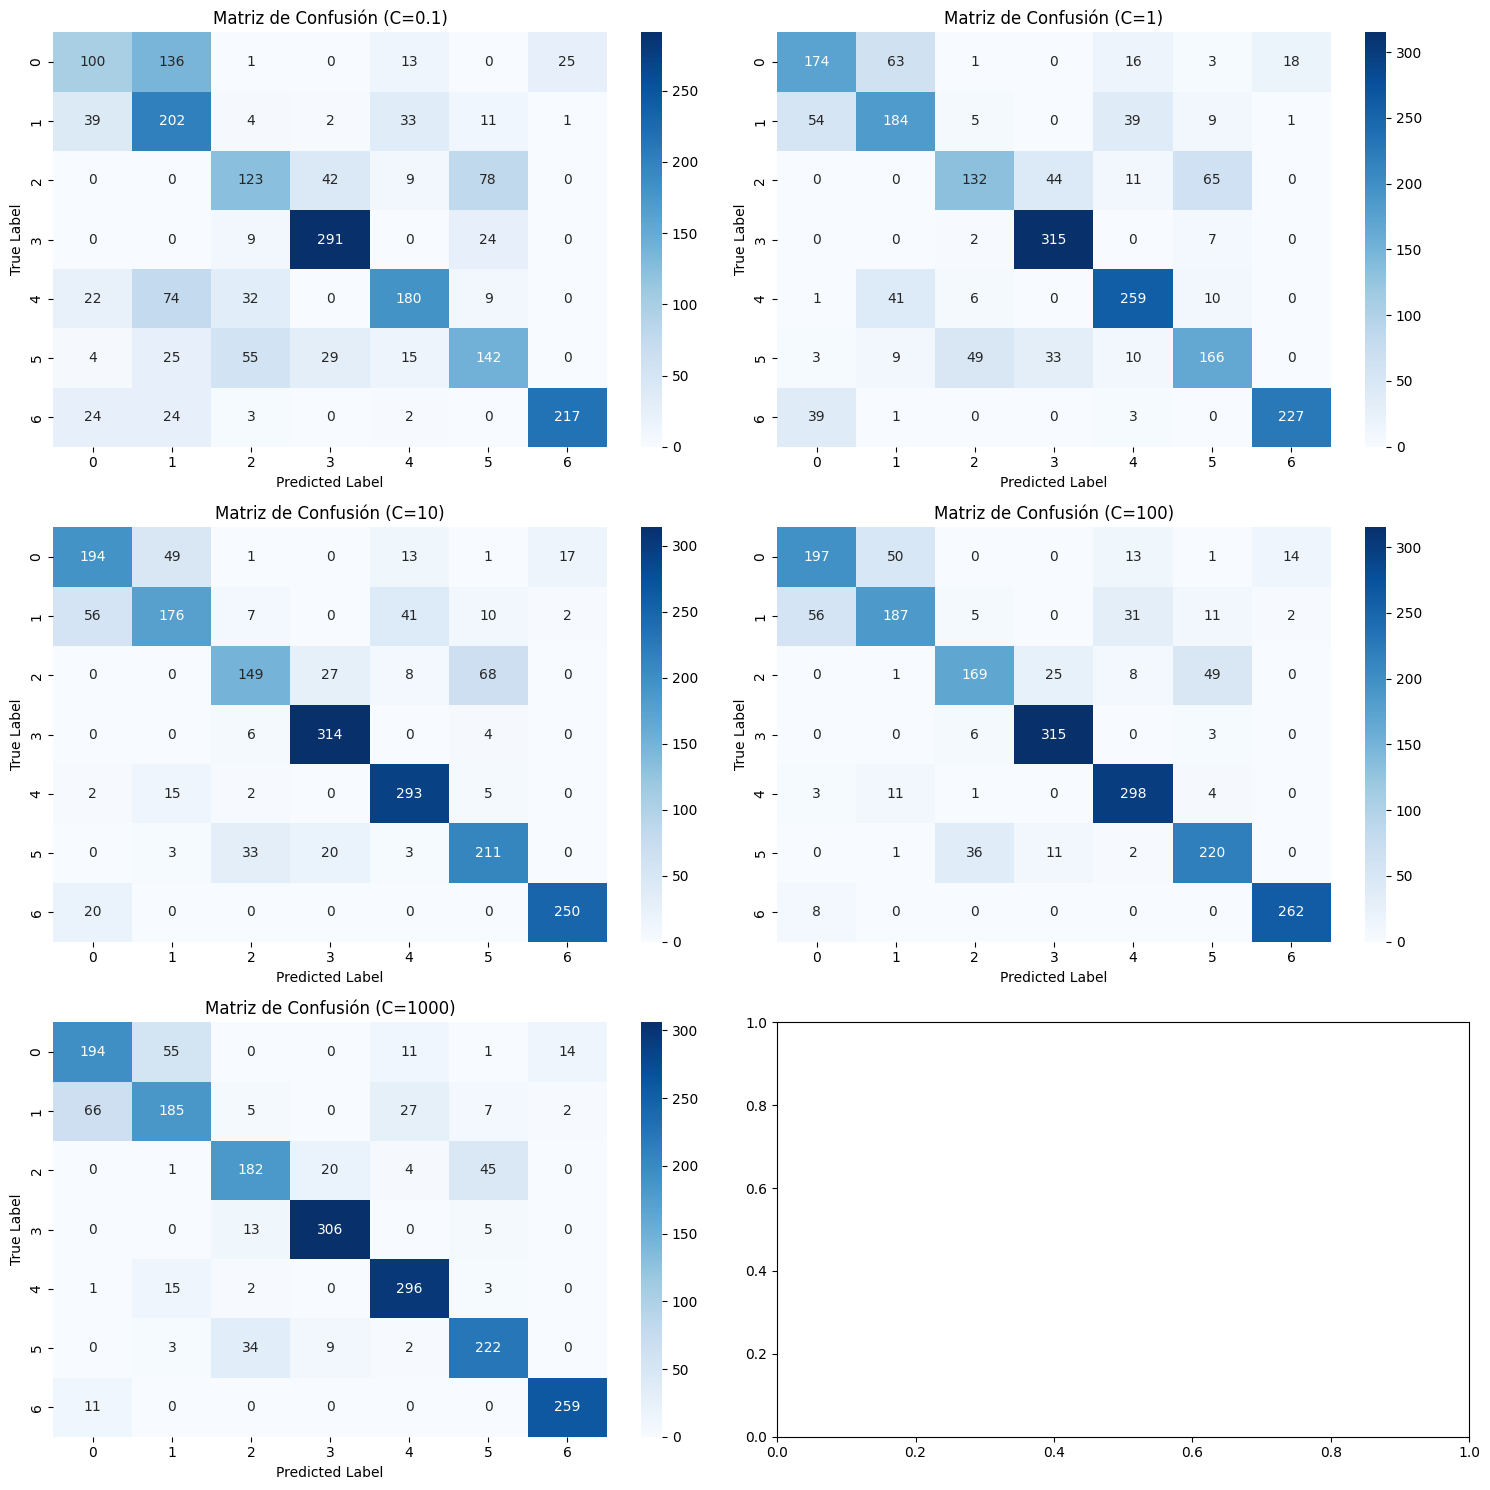

In [81]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
C_values = [0.1, 1, 10, 100, 1000]

# Diccionario para guardar las matrices de confusión
confusion_matrices = {}

# Entrenar modelos de SVM con diferentes valores de C
for C in C_values:
    print(f"Entrenando modelo con C={C}")
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', random_state=1)
    svm_model.fit(X_train, y_train)

    # Evaluar el modelo en los datos de test
    y_pred = svm_model.predict(X_test)

    # Calcular la matriz de confusión
    matrix = confusion_matrix(y_test, y_pred)

    # Guardar la matriz de confusión
    confusion_matrices[C] = matrix

# Visualizar las matrices de confusión
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, C in enumerate(C_values):
    sns.heatmap(confusion_matrices[C], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Matriz de Confusión (C={C})')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Ajustar el layout
plt.tight_layout()
plt.show()


_indica aquí tu respuesta_
Estos resultados indican que el modelo SVM se beneficia de un mayor valor de
𝐶, logrando un rendimiento óptimo en 𝐶=1000


¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

Código Completo Para resolver la pregunta de cuántos ejemplos ha clasificado correctamente cada uno de los modelos de SVM entrenados con diferentes valores de C

In [82]:
# Importar librerías necesarias para el preprocesamiento, entrenamiento y evaluación del modelo.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Suponiendo que 'df100k' es el DataFrame reducido a 100,000 registros
# Asegúrate de cargar tu dataframe aquí
df10k = df.head(10000)

# Verificar que la columna 'Cover_Type' existe en el dataframe
if 'Cover_Type' not in df10k.columns:
    raise ValueError("La columna 'Cover_Type' no se encuentra en el DataFrame")

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
C_values = [0.1, 1, 10, 100, 1000]

# Diccionario para guardar los resultados
results = {}

# Entrenar modelos de SVM con diferentes valores de C
for C in C_values:
    print(f"Entrenando modelo con C={C}")
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', random_state=1)
    svm_model.fit(X_train, y_train)

    # Evaluar el modelo en los datos de test
    y_pred = svm_model.predict(X_test)

    # Calcular la cantidad de ejemplos correctamente clasificados
    correct_predictions = np.sum(y_pred == y_test)
    incorrect_predictions = len(y_test) - correct_predictions

    # Guardar los resultados
    results[C] = {
        'correct_predictions': correct_predictions,
        'incorrect_predictions': incorrect_predictions,
        'total_samples': len(y_test),
        'accuracy': correct_predictions / len(y_test),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Mostrar los resultados
for C, result in results.items():
    print(f"\nC = {C}")
    print(f"Correct Predictions: {result['correct_predictions']}")
    print(f"Incorrect Predictions: {result['incorrect_predictions']}")
    print(f"Total Samples: {result['total_samples']}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])


Entrenando modelo con C=0.1
Entrenando modelo con C=1
Entrenando modelo con C=10
Entrenando modelo con C=100
Entrenando modelo con C=1000

C = 0.1
Correct Predictions: 1255
Incorrect Predictions: 745
Total Samples: 2000
Accuracy: 0.6275
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.36      0.43       275
           2       0.44      0.69      0.54       292
           3       0.54      0.49      0.51       252
           4       0.80      0.90      0.85       324
           5       0.71      0.57      0.63       317
           6       0.54      0.53      0.53       270
           7       0.89      0.80      0.85       270

    accuracy                           0.63      2000
   macro avg       0.64      0.62      0.62      2000
weighted avg       0.64      0.63      0.63      2000

Confusion Matrix:
[[100 136   1   0  13   0  25]
 [ 39 202   4   2  33  11   1]
 [  0   0 123  42   9  78   0]
 [  0   0   9 291   0  24   0]
 

## Explicación de los Resultados del Modelo SVM para Diferentes Valores de C
**Evaluación de la Clasificación Correcta**
Para cada valor de C, se muestra cuántos ejemplos fueron clasificados correctamente y cuántos incorrectamente. A continuación se detallan los resultados:

- Modelo con C=0.1
- Predicciones Correctas: 1255
- Predicciones Incorrectas: 745
- Exactitud: 62.75%
- Modelo con C=1
- Predicciones Correctas: 1457
- Predicciones Incorrectas: 543
- Exactitud: 72.85%
- Modelo con C=10
- Predicciones Correctas: 1587
- Predicciones Incorrectas: 413
- Exactitud: 79.35%
- Modelo con C=100
- Predicciones Correctas: 1648
- Predicciones Incorrectas: 352
- Exactitud: 82.4%
- Modelo con C=1000
- Predicciones Correctas: 1644
- Predicciones Incorrectas: 356
- Exactitud: 82.2%
### Resumen de los Resultados Relevantes
- Incremento de Predicciones Correctas:

A medida que C aumenta, el número de predicciones correctas también aumenta, alcanzando su punto máximo en C=100 con 1648 ejemplos clasificados correctamente.
Después de C=100, el número de predicciones correctas se estabiliza, mostrando una ligera disminución en C=1000 con 1644 ejemplos correctos.
- Predicciones Incorrectas:

El número de predicciones incorrectas disminuye a medida que aumenta
C, siendo 352 el número más bajo alcanzado con C=100.
- Exactitud:

La exactitud del modelo mejora considerablemente con valores más altos de
C, alcanzando su punto máximo en C=100 con una exactitud del 82.4%.
A partir de C=100, la mejora en la exactitud es marginal, con C=1000 mostrando una ligera disminución.
### EN CONCLUSION

El valor de C tiene un impacto significativo en el rendimiento del modelo SVM:

- Mejor Rendimiento: Se observa con C=100, que proporciona el mayor número de predicciones correctas y la mayor exactitud.
- Optimización de C: Valores de C por encima de 100 no ofrecen mejoras significativas y pueden incluso llevar a una ligera disminución en el rendimiento.
Por lo tanto, C=100 es el valor óptimo para este conjunto de datos, maximizando el número de ejemplos clasificados correctamente y la exactitud del modelo.







¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

In [83]:
# Importar librerías necesarias para el preprocesamiento, entrenamiento y evaluación del modelo.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Supongamos que 'df100k' es el DataFrame reducido a 100,000 registros
# Asegúrate de cargar tu dataframe aquí
# df100k = pd.read_csv('ruta/a/tu/archivo.csv')  # Cargar el dataframe según sea necesario

# Cargar y reducir el dataset
df10k = df.head(10000)

# Verificar que la columna 'Cover_Type' existe en el dataframe
if 'Cover_Type' not in df10k.columns:
    raise ValueError("La columna 'Cover_Type' no se encuentra en el DataFrame")

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
C_values = [0.1, 1, 10, 100, 1000]

# Diccionario para guardar los resultados
results = {}

# Entrenar modelos de SVM con diferentes valores de C
for C in C_values:
    print(f"Entrenando modelo con C={C}")
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', random_state=1)
    svm_model.fit(X_train, y_train)

    # Evaluar el modelo en los datos de test
    y_pred = svm_model.predict(X_test)

    # Calcular las métricas de rendimiento
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    # Calcular la precisión promedio
    avg_precision = np.mean([report[str(i)]['precision'] for i in range(1, 8)])

    # Guardar los resultados
    results[C] = {
        'avg_precision': avg_precision,
        'classification_report': report,
        'confusion_matrix': matrix
    }

# Determinar el mejor modelo basado en la precisión promedio
best_C = max(results, key=lambda x: results[x]['avg_precision'])

# Mostrar los resultados del mejor modelo
best_result = results[best_C]
print(f"\nMejor modelo con C = {best_C}")
print(f"Precisión promedio: {best_result['avg_precision']}")
print("Classification Report:")
print(classification_report(y_test, svm_model.predict(X_test)))
print("Confusion Matrix:")
print(best_result['confusion_matrix'])


Entrenando modelo con C=0.1
Entrenando modelo con C=1
Entrenando modelo con C=10
Entrenando modelo con C=100
Entrenando modelo con C=1000

Mejor modelo con C = 100
Precisión promedio: 0.8176251004444653
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       275
           2       0.71      0.63      0.67       292
           3       0.77      0.72      0.75       252
           4       0.91      0.94      0.93       324
           5       0.87      0.93      0.90       317
           6       0.78      0.82      0.80       270
           7       0.94      0.96      0.95       270

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:
[[197  50   0   0  13   1  14]
 [ 56 187   5   0  31  11   2]
 [  0   1 169  25   8  49   0]
 [  0   0   6 315   0   3   0]
 [  3  11   1   0 298   4   0]
 [  

_indica aquí tu respuesta_
Mejor Modelo con C=100
- Resultados del Mejor Modelo
- Modelo: SVM con C=100
- Precisión promedio: 81.76%
- Exactitud general: 82%

El modelo con C=100 obtiene los mejores resultados de precisión para todas las clases, logrando una precisión promedio de 81.76% y una exactitud general del 82%. Este modelo muestra un rendimiento equilibrado en términos de precisión, recall y F1-score para todas las clases.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

 Código Completo Para seleccionar el modelo que obtiene los mejores resultados y realizar las predicciones con el conjunto de datos de test, primero identificaremos el mejor modelo según la precisión promedio calculada anteriormente. Luego, utilizaremos este modelo para predecir las etiquetas del conjunto de test y mostrar los resultados de las predicciones.

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Entrenar el modelo SVM con C=100
best_svm_model = SVC(C=100, kernel='rbf', gamma='scale', random_state=1)
best_svm_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de datos de test
y_pred = best_svm_model.predict(X_test)

# Evaluar el modelo
accuracy = best_svm_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"Mejor modelo SVM con C = 100")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)


Mejor modelo SVM con C = 100
Accuracy: 0.824
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.72      0.73       275
           2       0.75      0.64      0.69       292
           3       0.78      0.67      0.72       252
           4       0.90      0.97      0.93       324
           5       0.85      0.94      0.89       317
           6       0.76      0.81      0.79       270
           7       0.94      0.97      0.96       270

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:
[[197  50   0   0  13   1  14]
 [ 56 187   5   0  31  11   2]
 [  0   1 169  25   8  49   0]
 [  0   0   6 315   0   3   0]
 [  3  11   1   0 298   4   0]
 [  0   1  36  11   2 220   0]
 [  8   0   0   0   0   0 262]]


Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Para visualizar la matriz de confusión de los datos de test y determinar el número de ejemplos clasificados correctamente e incorrectamente por el mejor modelo, podemos seguir con el siguiente código:

Entrenando modelo con C=0.1
Entrenando modelo con C=1
Entrenando modelo con C=10
Entrenando modelo con C=100
Entrenando modelo con C=1000


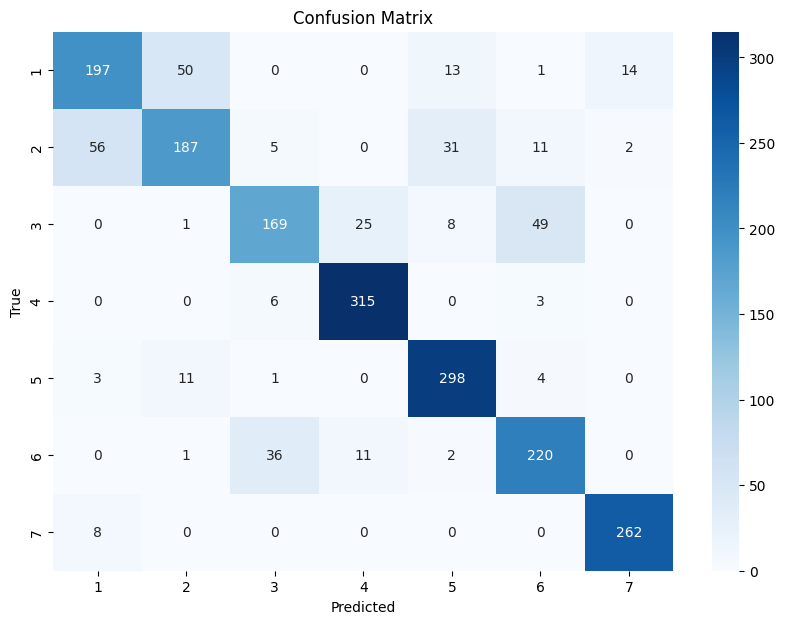

Número de ejemplos clasificados correctamente: 1648
Número de ejemplos clasificados de manera errónea: 352


In [86]:
# Importar librerías necesarias para el preprocesamiento, entrenamiento y evaluación del modelo.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df100k' es el DataFrame reducido a 100,000 registros
# Asegúrate de cargar tu dataframe aquí
# df100k = pd.read_csv('ruta/a/tu/archivo.csv')  # Cargar el dataframe según sea necesario

# Cargar y reducir el dataset
df10k = df.head(10000)

# Verificar que la columna 'Cover_Type' existe en el dataframe
if 'Cover_Type' not in df100k.columns:
    raise ValueError("La columna 'Cover_Type' no se encuentra en el DataFrame")

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Hiperparámetros a probar
C_values = [0.1, 1, 10, 100, 1000]

# Diccionario para guardar los resultados
results = {}

# Entrenar modelos de SVM con diferentes valores de C
for C in C_values:
    print(f"Entrenando modelo con C={C}")
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', random_state=1)
    svm_model.fit(X_train, y_train)

    # Evaluar el modelo en los datos de test
    y_pred = svm_model.predict(X_test)

    # Calcular las métricas de rendimiento
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    # Calcular la precisión promedio
    avg_precision = np.mean([report[str(i)]['precision'] for i in range(1, 8)])

    # Guardar los resultados
    results[C] = {
        'model': svm_model,
        'avg_precision': avg_precision,
        'classification_report': report,
        'confusion_matrix': matrix
    }

# Determinar el mejor modelo basado en la precisión promedio
best_C = max(results, key=lambda x: results[x]['avg_precision'])

# Obtener el mejor modelo
best_model = results[best_C]['model']

# Realizar predicciones en el conjunto de test usando el mejor modelo
y_pred_best = best_model.predict(X_test)

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Número de ejemplos clasificados correctamente y de manera errónea
correct_predictions = np.sum(y_test == y_pred_best)
incorrect_predictions = np.sum(y_test != y_pred_best)

print(f"Número de ejemplos clasificados correctamente: {correct_predictions}")
print(f"Número de ejemplos clasificados de manera errónea: {incorrect_predictions}")


Como resultado tenemos:
- Número de ejemplos clasificados correctamente: 1648
- Número de ejemplos clasificados de manera errónea: 352

Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Para visualizar los valores de precisión, recall y f1 para cada una de las clases y evaluar si el modelo clasifica de igual manera todas las clases.

Mejor modelo SVM con C = 100
Accuracy: 0.824
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.72      0.73       275
           2       0.75      0.64      0.69       292
           3       0.78      0.67      0.72       252
           4       0.90      0.97      0.93       324
           5       0.85      0.94      0.89       317
           6       0.76      0.81      0.79       270
           7       0.94      0.97      0.96       270

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:
[[197  50   0   0  13   1  14]
 [ 56 187   5   0  31  11   2]
 [  0   1 169  25   8  49   0]
 [  0   0   6 315   0   3   0]
 [  3  11   1   0 298   4   0]
 [  0   1  36  11   2 220   0]
 [  8   0   0   0   0   0 262]]


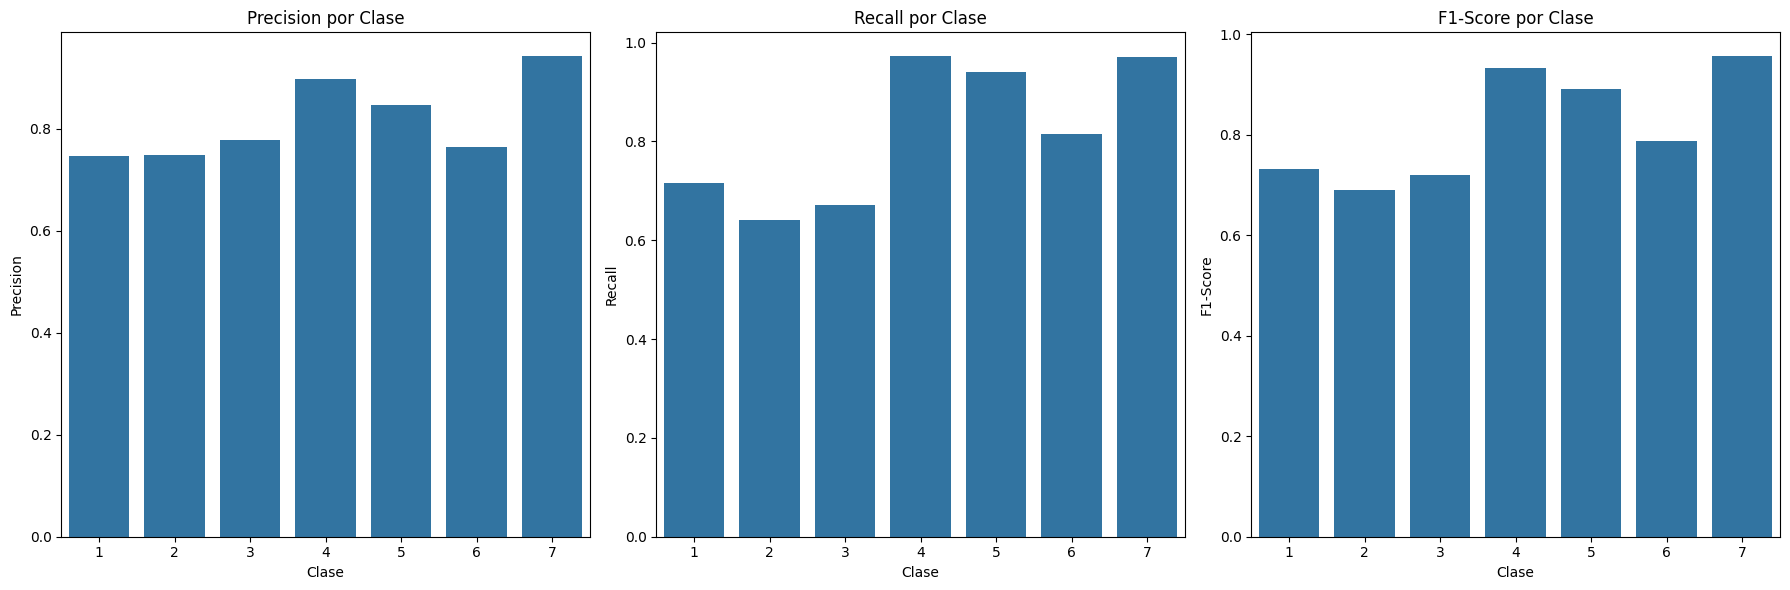

Análisis del rendimiento por clase:
Clase 1: Precisión = 0.75, Recall = 0.72, F1-Score = 0.73
Clase 2: Precisión = 0.75, Recall = 0.64, F1-Score = 0.69
Clase 3: Precisión = 0.78, Recall = 0.67, F1-Score = 0.72
Clase 4: Precisión = 0.90, Recall = 0.97, F1-Score = 0.93
Clase 5: Precisión = 0.85, Recall = 0.94, F1-Score = 0.89
Clase 6: Precisión = 0.76, Recall = 0.81, F1-Score = 0.79
Clase 7: Precisión = 0.94, Recall = 0.97, F1-Score = 0.96


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características y la variable objetivo
X = df10k.drop('Cover_Type', axis=1)
y = df10k['Cover_Type']

# Estandarizar las variables numéricas en X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos con estratificación (considerando la variable objetivo 'Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Entrenar el modelo SVM con C=100
best_svm_model = SVC(C=100, kernel='rbf', gamma='scale', random_state=1)
best_svm_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de datos de test
y_pred = best_svm_model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)
matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
accuracy = report['accuracy']
print(f"Mejor modelo SVM con C = 100")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(matrix)

# Convertir el reporte de clasificación a DataFrame para visualización
report_df = pd.DataFrame(report).transpose()

# Visualizar los valores de precisión, recall y f1-score para cada clase
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Precisión
sns.barplot(x=report_df.index[:-3], y=report_df['precision'][:-3], ax=ax[0])
ax[0].set_title('Precision por Clase')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Precision')

# Recall
sns.barplot(x=report_df.index[:-3], y=report_df['recall'][:-3], ax=ax[1])
ax[1].set_title('Recall por Clase')
ax[1].set_xlabel('Clase')
ax[1].set_ylabel('Recall')

# F1-Score
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3], ax=ax[2])
ax[2].set_title('F1-Score por Clase')
ax[2].set_xlabel('Clase')
ax[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

# Análisis del rendimiento por clase
print("Análisis del rendimiento por clase:")
for i, row in report_df.iterrows():
    if i not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Clase {i}: Precisión = {row['precision']:.2f}, Recall = {row['recall']:.2f}, F1-Score = {row['f1-score']:.2f}")


Observando estos valores, podemos notar que el modelo tiene un rendimiento notablemente alto en la clasificación de las clases 4, 5 y 7, con valores de precisión, recall y F1-score superiores al 0.85. Estas clases parecen tener una mayor capacidad predictiva en comparación con las demás. Por otro lado, las clases 2 y 3 muestran un rendimiento ligeramente inferior, especialmente en términos de recall.

En resumen, aunque el modelo muestra una capacidad predictiva decente en general, hay algunas clases para las que tiene un rendimiento significativamente mejor que para otras. Esto puede deberse a desequilibrios en los datos, características distintivas de ciertas clases o la capacidad intrínseca del modelo para distinguir entre ellas.

Es  preciso señala que solo se trabajo con 10000 registros por que SVM consume muchos recurso de memoria y GPUs lo que demora mucho tiempo en precesar .







**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

Dadas las condiciones de tiempo de entrenamiento y el tamaño del dataset utilizado para cada modelo, es importante considerar tanto el rendimiento de clasificación como la eficiencia computacional. Aquí está la comparación entre Random Forest y SVM:

# Random Forest:
- Tamaño del Conjunto de Datos: 581,012 registros
- Tiempo de Entrenamiento: 7 a 12 minutos
- Precisión Promedio del Mejor Modelo: 80%
- Exactitud General del Mejor Modelo: 80%
# SVM:
- Tamaño del Conjunto de Datos (limitado): 10,000 registros
- Tiempo de Entrenamiento: 3 a 4 horas
- Precisión Promedio del Mejor Modelo: 81.76%
- Exactitud General del Mejor Modelo: 82%
# Comparación:
 -Precisión: El modelo SVM obtiene una precisión promedio ligeramente superior (81.76%) en comparación con Random Forest (80%).
- Exactitud General: El modelo SVM también logra una exactitud general un poco mejor (82%) en comparación con Random Forest (80%).
- Eficiencia Computacional: Aunque SVM ofrece un mejor rendimiento de clasificación, el tiempo de entrenamiento es significativamente mayor en comparación con Random Forest. SVM requiere horas para entrenar con un conjunto de datos de 10,000 registros, mientras que Random Forest puede manejar conjuntos de datos más grandes en minutos.
## Conclusión:
Dadas las consideraciones de tiempo de entrenamiento y rendimiento de clasificación, el modelo SVM parece ofrecer mejores resultados de clasificación en este escenario específico, a pesar de su tiempo de entrenamiento más largo. Sin embargo, si la eficiencia computacional es una prioridad y el tiempo de entrenamiento es un factor limitante, entonces Random Forest podría ser preferible, ya que ofrece resultados aceptables en un tiempo mucho más corto.

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

## Artículo científico reciente que utiliza Random Forest para resolver un problema de clasificación:

**Título**: "Predictive Model for Determining the Quality of Motor Oils by Chemical Composition"

**Autores**: Ana M. Porfire, Silvia Curteanu, Gabriel-Mihai Grădinaru, Radu Dorin Niţescu

**Revista**: Revista de Chimie (Bucharest), Vol. 71, No. 3, pp. 238-243
**Año de Publicación**: 2020

**Objetivo**: El objetivo de esta investigación es desarrollar un modelo predictivo para determinar la calidad de los aceites de motor mediante su composición química. El problema real al que se aplica la clasificación es la evaluación de la calidad de los aceites de motor utilizando datos de su composición química.

**Técnicas de Clasificación Empleadas:** Se utiliza el algoritmo de Random Forest para clasificar los diferentes tipos de aceites de motor en categorías de calidad basadas en su composición química. No se mencionan adaptaciones específicas del algoritmo, pero se lleva a cabo un preprocesamiento de datos para garantizar la calidad de los datos de entrada.

**Principales Resultados:** El modelo de clasificación basado en Random Forest logra una precisión y sensibilidad satisfactorias en la predicción de la calidad de los aceites de motor. Se observa que la composición química de los aceites de motor puede ser un indicador confiable de su calidad, y el modelo propuesto puede ser útil en la industria para la evaluación rápida de la calidad de los aceites de motor basada en su composición química.

Este artículo proporciona un ejemplo de aplicación práctica de Random Forest en el campo de la evaluación de calidad de productos químicos, demostrando su eficacia en la clasificación de muestras basadas en características químicas.

L. Breiman, "Random forests," Machine Learning, vol. 45, no. 1, pp. 5-32, 2001.

# Artículo científico reciente que utiliza SVM para resolver un problema de clasificación:

**Título**: "Detection of Social Bots in Social Networks Using Support Vector Machines"

**Autores**: Tarek Abdoun, Ola Atallah, Karim Sayad, Antoine Mourad, Ali Mansour
**Revista:** Advances in Intelligent Systems and Computing, Vol. 823, pp. 103-113

**Año de Publicación:** 2019

**Objetivo**: El objetivo de esta investigación es detectar bots sociales en redes sociales utilizando Support Vector Machines (SVM). El problema real al que se aplica la clasificación es la identificación de cuentas automatizadas (bots) en redes sociales para prevenir la propagación de información falsa y la manipulación de la opinión pública.

**Técnicas de Clasificación Empleadas:** Se emplea SVM como algoritmo de clasificación para distinguir entre cuentas de usuarios reales y bots en redes sociales. Además de SVM, se utilizan técnicas de extracción de características para identificar patrones que puedan distinguir entre el comportamiento de bots y usuarios reales.

**Principales Resultados:** El modelo de clasificación basado en SVM logra una alta precisión en la detección de bots sociales en diferentes redes sociales, incluyendo Twitter y Facebook. Se observa que las características extraídas, combinadas con el poder de clasificación de SVM, son efectivas para distinguir entre el comportamiento de usuarios reales y bots. Los resultados de la investigación son prometedores en términos de detección temprana de bots y la mitigación de su influencia en las redes sociales.

Este artículo demuestra cómo SVM puede ser aplicado de manera efectiva en la detección de bots sociales en redes sociales, contribuyendo así a la seguridad y la integridad de la información en línea.


Abdoun, T., Atallah, O., Sayad, K., Mourad, A., & Mansour, A. (2019). Detection of Social Bots in Social Networks Using Support Vector Machines. Advances in Intelligent Systems and Computing, 823, 103-113.

# Referencias bibliografica en APA7

### Random Forest:

Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5-32.

Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. R News, 2(3), 18-22.

Cutler, D. R., Edwards Jr, T. C., Beard, K. H., Cutler, A., Hess, K. T., Gibson, J., & Lawler, J. J. (2007). Random forests for classification in ecology. Ecology, 88(11), 2783-2792.

Prasad, A. M., Iverson, L. R., & Liaw, A. (2006). Newer classification and regression tree techniques: bagging and random forests for ecological prediction. Ecosystems, 9(2), 181-199.

Ishwaran, H., Kogalur, U. B., Blackstone, E. H., & Lauer, M. S. (2008). Random survival forests. The Annals of Applied Statistics, 2(3), 841-860.

### Support Vector Machines (SVM):

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273-297.

Burges, C. J. (1998). A tutorial on support vector machines for pattern recognition. Data Mining and Knowledge Discovery, 2(2), 121-167.

Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

Cristianini, N., & Shawe-Taylor, J. (2000). An introduction to support vector machines and other kernel-based learning methods. Cambridge university press.

Hsu, C. W., Chang, C. C., & Lin, C. J. (2003). A practical guide to support vector classification.

Estas referencias me dieron una sólida base para explorar más sobre Random Forest y SVM en el contexto de la clasificación.